In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#시도 및 질환별 중증응급환자 119 구급차 이용률

file_path = '/Users/mac/Desktop/빅데이터 프로젝트/인구수.xlsx'
df = pd.read_excel(file_path)
print(df)


        시점 행정구역(시군구)별  성별           계     0 - 4세     5 - 9세       0-9세  \
0   2021.0         전국   계  51333252.5  1603407.5  2259652.5  3863060.0   
1      NaN        NaN  남자  25589102.0   822670.5  1158010.5  1980681.0   
2      NaN        NaN  여자  25744150.5   780737.0  1101642.0  1882379.0   
3      NaN      서울특별시   계   9453878.0   257416.5   345579.0   602995.5   
4      NaN        NaN  남자   4593754.0   132592.5   177071.0   309663.5   
5      NaN        NaN  여자   4860124.0   124824.0   168508.0   293332.0   
6      NaN      부산광역시   계   3343353.0    92557.5   133319.0   225876.5   
7      NaN        NaN  남자   1636288.0    47435.0    68465.5   115900.5   
8      NaN        NaN  여자   1707065.0    45122.5    64853.5   109976.0   
9      NaN      대구광역시   계   2387449.5    70270.0   102692.0   172962.0   
10     NaN        NaN  남자   1176548.5    36087.0    52514.0    88601.0   
11     NaN        NaN  여자   1210901.0    34183.0    50178.0    84361.0   
12     NaN      인천광역시   계   2921874.5 

In [10]:

seoul_m = [df.iloc[4:5,3:4],df.iloc[4:5,6:7],df.iloc[4:5,9:10],df.iloc[4:5,12:13],df.iloc[4:5,15:16],df.iloc[4:5,18:19],df.iloc[4:5,21:22],df.iloc[4:5,24:25],df.iloc[4:5,27:28],df.iloc[4:5,35:36]]
seoul_m = [value for df in seoul_m for value in df.values[0]]
print(seoul_m)

seoul_w = [df.iloc[5:6,3:4],df.iloc[5:6,6:7],df.iloc[5:6,9:10],df.iloc[5:6,12:13],df.iloc[5:6,15:16],df.iloc[5:6,18:19],df.iloc[5:6,21:22],df.iloc[5:6,24:25],df.iloc[5:6,27:28],df.iloc[5:6,35:36]]
seoul_w = [value for df in seoul_w for value in df.values[0]]
print(seoul_w)


[4593754.0, 309663.5, 392990.5, 692033.5, 721753.5, 733025.0, 728810.0, 584201.5, 312245.0, 278583.5]
[4860124.0, 293332.0, 372910.0, 740737.5, 721924.0, 747687.0, 755340.5, 653760.0, 373671.0, 491196.0]


/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.

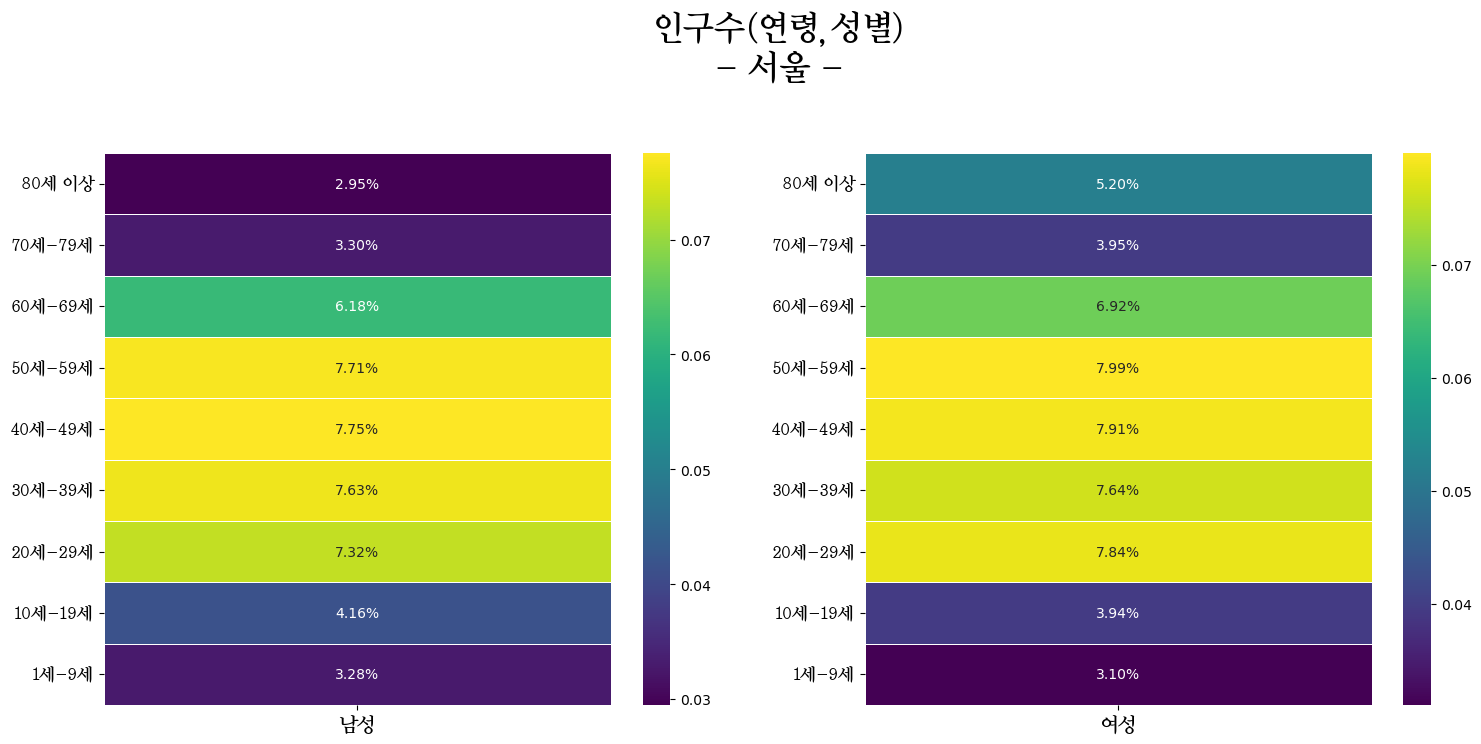

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# 한글 폰트 경로 지정
font_path = '/Users/mac/Desktop/빅데이터 프로젝트/project data/KBIZ한마음명조 B.otf'
font_prop = font_manager.FontProperties(fname=font_path)

# 데이터프레임 생성
data_m = {
    '남성': seoul_m[1:] / (seoul_m[0]+seoul_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

data_w = {
    '여성': seoul_w[1:] / (seoul_m[0]+seoul_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

df_m = pd.DataFrame(data_m)
df_w = pd.DataFrame(data_w)

# 데이터 뒤집기
df_m = df_m.iloc[::-1]
df_w = df_w.iloc[::-1]

# 나이 그룹 레이블 설정
age_labels = ['80세 이상', '70세-79세', '60세-69세', '50세-59세', '40세-49세', '30세-39세', '20세-29세', '10세-19세', '1세-9세']
df_m.index = age_labels
df_w.index = age_labels

# 색상 맵 및 정규화
cmap = plt.get_cmap('viridis')
normalize_m = plt.Normalize(vmin=df_m.values.min(), vmax=df_m.values.max())
normalize_w = plt.Normalize(vmin=df_w.values.min(), vmax=df_w.values.max())

colors_m = [cmap(normalize_m(value)) for value in df_m.values.flatten()]
colors_w = [cmap(normalize_w(value)) for value in df_w.values.flatten()]

# 플롯 설정
fig, ax = plt.subplots(1, 2, figsize=(18, 8))  # 1행 2열로 subplot 생성

# seaborn의 heatmap 사용
heatmap_m = sns.heatmap(df_m, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[0])
heatmap_w = sns.heatmap(df_w, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[1])

# 공통된 title 설정
fig.suptitle('인구수(연령,성별)\n- 서울 -\n', fontproperties=font_prop, fontsize=25, fontweight='bold')

# y축 레이블 설정 (비율은 이미 플롯 안에 표시되므로 생략)
for a in ax:
    a.set_yticklabels(df_m.index, rotation=0, fontproperties=font_prop, fontweight='bold', fontsize=13)  # y축 레이블에 나이 그룹 표시

# 컬럼 이름에 한글 폰트 적용
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), fontproperties=font_prop, fontsize=15, fontweight='bold')

# 타이틀과 그래프 사이에 여백 추가
plt.subplots_adjust(top=0.8)

plt.show()


In [5]:
busan_m = [df.iloc[7:8,3:4],df.iloc[7:8,6:7],df.iloc[7:8,9:10],df.iloc[7:8,12:13],df.iloc[7:8,15:16],df.iloc[7:8,18:19],df.iloc[7:8,21:22],df.iloc[7:8,24:25],df.iloc[7:8,27:28],df.iloc[7:8,35:36]]
busan_m = [value for df in busan_m for value in df.values[0]]
print(busan_m)

busan_w = [df.iloc[8:9,3:4],df.iloc[8:9,6:7],df.iloc[8:9,9:10],df.iloc[8:9,12:13],df.iloc[8:9,15:16],df.iloc[8:9,18:19],df.iloc[8:9,21:22],df.iloc[8:9,24:25],df.iloc[8:9,27:28],df.iloc[8:9,35:36]]
busan_w = [value for df in busan_w for value in df.values[0]]
print(busan_w)


[1636288.0, 115900.5, 138591.0, 219233.5, 209623.0, 252702.0, 269529.0, 252594.0, 132311.0, 106067.5]
[1707065.0, 109976.0, 129996.5, 202669.5, 199787.5, 248862.0, 285588.5, 281915.5, 160766.0, 212671.0]


/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.

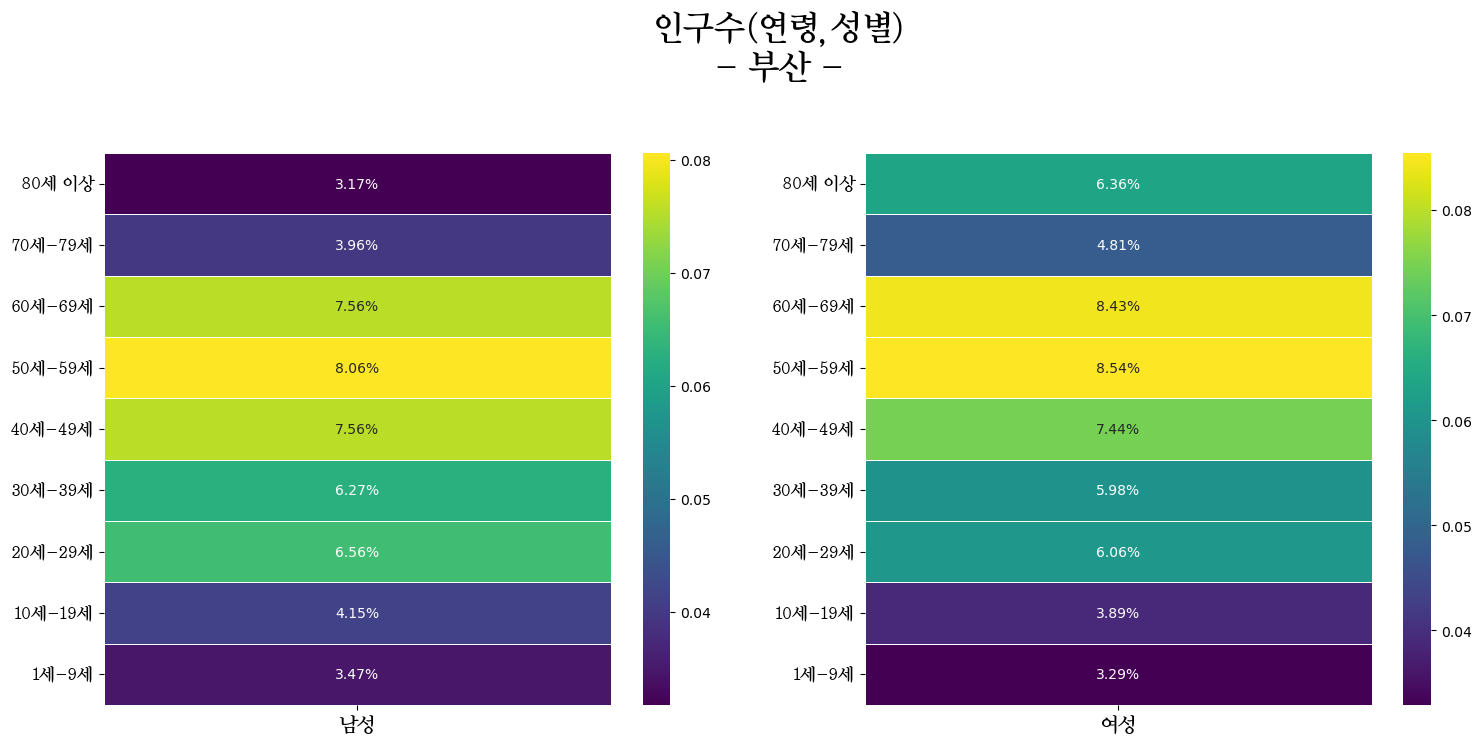

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# 한글 폰트 경로 지정
font_path = '/Users/mac/Desktop/빅데이터 프로젝트/project data/KBIZ한마음명조 B.otf'
font_prop = font_manager.FontProperties(fname=font_path)

# 데이터프레임 생성
data_m = {
    '남성': busan_m[1:] / (busan_m[0]+busan_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

data_w = {
    '여성': busan_w[1:] / (busan_m[0]+busan_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

df_m = pd.DataFrame(data_m)
df_w = pd.DataFrame(data_w)

# 데이터 뒤집기
df_m = df_m.iloc[::-1]
df_w = df_w.iloc[::-1]

# 나이 그룹 레이블 설정
age_labels = ['80세 이상', '70세-79세', '60세-69세', '50세-59세', '40세-49세', '30세-39세', '20세-29세', '10세-19세', '1세-9세']
df_m.index = age_labels
df_w.index = age_labels

# 색상 맵 및 정규화
cmap = plt.get_cmap('viridis')
normalize_m = plt.Normalize(vmin=df_m.values.min(), vmax=df_m.values.max())
normalize_w = plt.Normalize(vmin=df_w.values.min(), vmax=df_w.values.max())

colors_m = [cmap(normalize_m(value)) for value in df_m.values.flatten()]
colors_w = [cmap(normalize_w(value)) for value in df_w.values.flatten()]

# 플롯 설정
fig, ax = plt.subplots(1, 2, figsize=(18, 8))  # 1행 2열로 subplot 생성

# seaborn의 heatmap 사용
heatmap_m = sns.heatmap(df_m, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[0])
heatmap_w = sns.heatmap(df_w, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[1])

# 공통된 title 설정
fig.suptitle('인구수(연령,성별)\n- 부산 -\n', fontproperties=font_prop, fontsize=25, fontweight='bold')

# y축 레이블 설정 (비율은 이미 플롯 안에 표시되므로 생략)
for a in ax:
    a.set_yticklabels(df_m.index, rotation=0, fontproperties=font_prop, fontweight='bold', fontsize=13)  # y축 레이블에 나이 그룹 표시

# 컬럼 이름에 한글 폰트 적용
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), fontproperties=font_prop, fontsize=15, fontweight='bold')

# 타이틀과 그래프 사이에 여백 추가
plt.subplots_adjust(top=0.8)

plt.show()


In [12]:
degu_m = [df.iloc[10:11,3:4],df.iloc[10:11,6:7],df.iloc[10:11,9:10],df.iloc[10:11,12:13],df.iloc[10:11,15:16],df.iloc[10:11,18:19],df.iloc[10:11,21:22],df.iloc[10:11,24:25],df.iloc[10:11,27:28],df.iloc[10:11,35:36]]
degu_m = [value for df in degu_m for value in df.values[0]]
print(degu_m)

degu_w = [df.iloc[11:12,3:4],df.iloc[11:12,6:7],df.iloc[11:12,9:10],df.iloc[11:12,12:13],df.iloc[11:12,15:16],df.iloc[11:12,18:19],df.iloc[11:12,21:22],df.iloc[11:12,24:25],df.iloc[11:12,27:28],df.iloc[11:12,35:36]]
degu_w = [value for df in degu_w for value in df.values[0]]
print(degu_w)


[1176548.5, 88601.0, 115876.5, 167611.5, 150349.0, 184998.5, 204525.0, 157649.0, 76864.0, 70452.0]
[1210901.0, 84361.0, 106099.5, 146728.5, 137634.5, 190224.5, 214070.5, 173862.5, 98661.0, 144309.5]


/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.

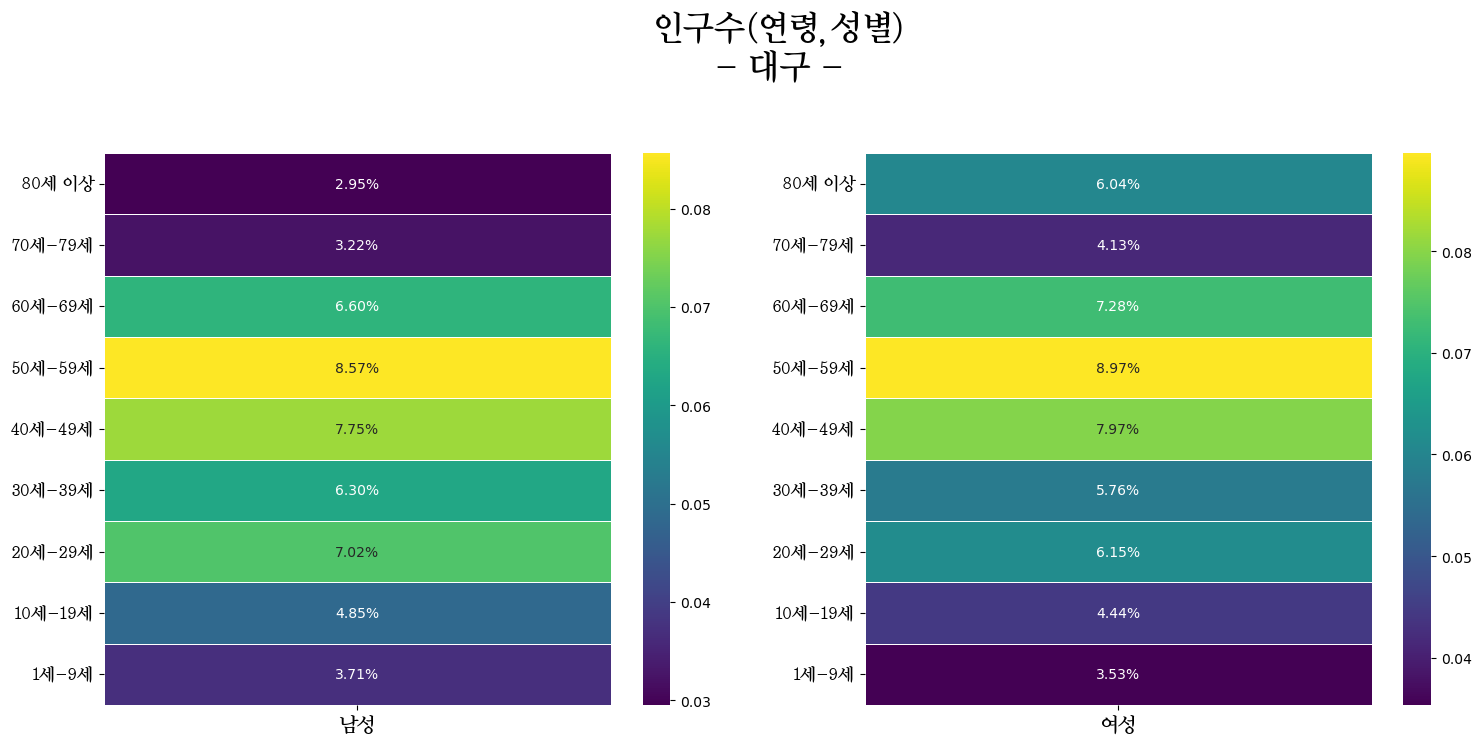

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# 한글 폰트 경로 지정
font_path = '/Users/mac/Desktop/빅데이터 프로젝트/project data/KBIZ한마음명조 B.otf'
font_prop = font_manager.FontProperties(fname=font_path)

# 데이터프레임 생성
data_m = {
    '남성': degu_m[1:] / (degu_m[0]+degu_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

data_w = {
    '여성': degu_w[1:] / (degu_m[0]+degu_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

df_m = pd.DataFrame(data_m)
df_w = pd.DataFrame(data_w)

# 데이터 뒤집기
df_m = df_m.iloc[::-1]
df_w = df_w.iloc[::-1]

# 나이 그룹 레이블 설정
age_labels = ['80세 이상', '70세-79세', '60세-69세', '50세-59세', '40세-49세', '30세-39세', '20세-29세', '10세-19세', '1세-9세']
df_m.index = age_labels
df_w.index = age_labels

# 색상 맵 및 정규화
cmap = plt.get_cmap('viridis')
normalize_m = plt.Normalize(vmin=df_m.values.min(), vmax=df_m.values.max())
normalize_w = plt.Normalize(vmin=df_w.values.min(), vmax=df_w.values.max())

colors_m = [cmap(normalize_m(value)) for value in df_m.values.flatten()]
colors_w = [cmap(normalize_w(value)) for value in df_w.values.flatten()]

# 플롯 설정
fig, ax = plt.subplots(1, 2, figsize=(18, 8))  # 1행 2열로 subplot 생성

# seaborn의 heatmap 사용
heatmap_m = sns.heatmap(df_m, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[0])
heatmap_w = sns.heatmap(df_w, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[1])

# 공통된 title 설정
fig.suptitle('인구수(연령,성별)\n- 대구 -\n', fontproperties=font_prop, fontsize=25, fontweight='bold')

# y축 레이블 설정 (비율은 이미 플롯 안에 표시되므로 생략)
for a in ax:
    a.set_yticklabels(df_m.index, rotation=0, fontproperties=font_prop, fontweight='bold', fontsize=13)  # y축 레이블에 나이 그룹 표시

# 컬럼 이름에 한글 폰트 적용
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), fontproperties=font_prop, fontsize=15, fontweight='bold')

# 타이틀과 그래프 사이에 여백 추가
plt.subplots_adjust(top=0.8)

plt.show()


In [15]:
incheon_m = [df.iloc[13:14,3:4],df.iloc[13:14,6:7],df.iloc[13:14,9:10],df.iloc[13:14,12:13],df.iloc[13:14,15:16],df.iloc[13:14,18:19],df.iloc[13:14,21:22],df.iloc[13:14,24:25],df.iloc[13:14,27:28],df.iloc[13:14,35:36]]
incheon_m = [value for df in incheon_m for value in df.values[0]]
print(incheon_m)

incheon_w = [df.iloc[14:15,3:4],df.iloc[14:15,6:7],df.iloc[14:15,9:10],df.iloc[14:15,12:13],df.iloc[14:15,15:16],df.iloc[14:15,18:19],df.iloc[14:15,21:22],df.iloc[14:15,24:25],df.iloc[14:15,27:28],df.iloc[14:15,35:36]]
incheon_w = [value for df in incheon_w for value in df.values[0]]
print(incheon_w)


[1462112.5, 114377.5, 139909.0, 205640.5, 207387.0, 244166.5, 251942.0, 187758.5, 80808.0, 71011.5]
[1459762.0, 108486.5, 132152.5, 188895.5, 193487.0, 233518.5, 253485.0, 191655.0, 96071.0, 153373.0]


/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.

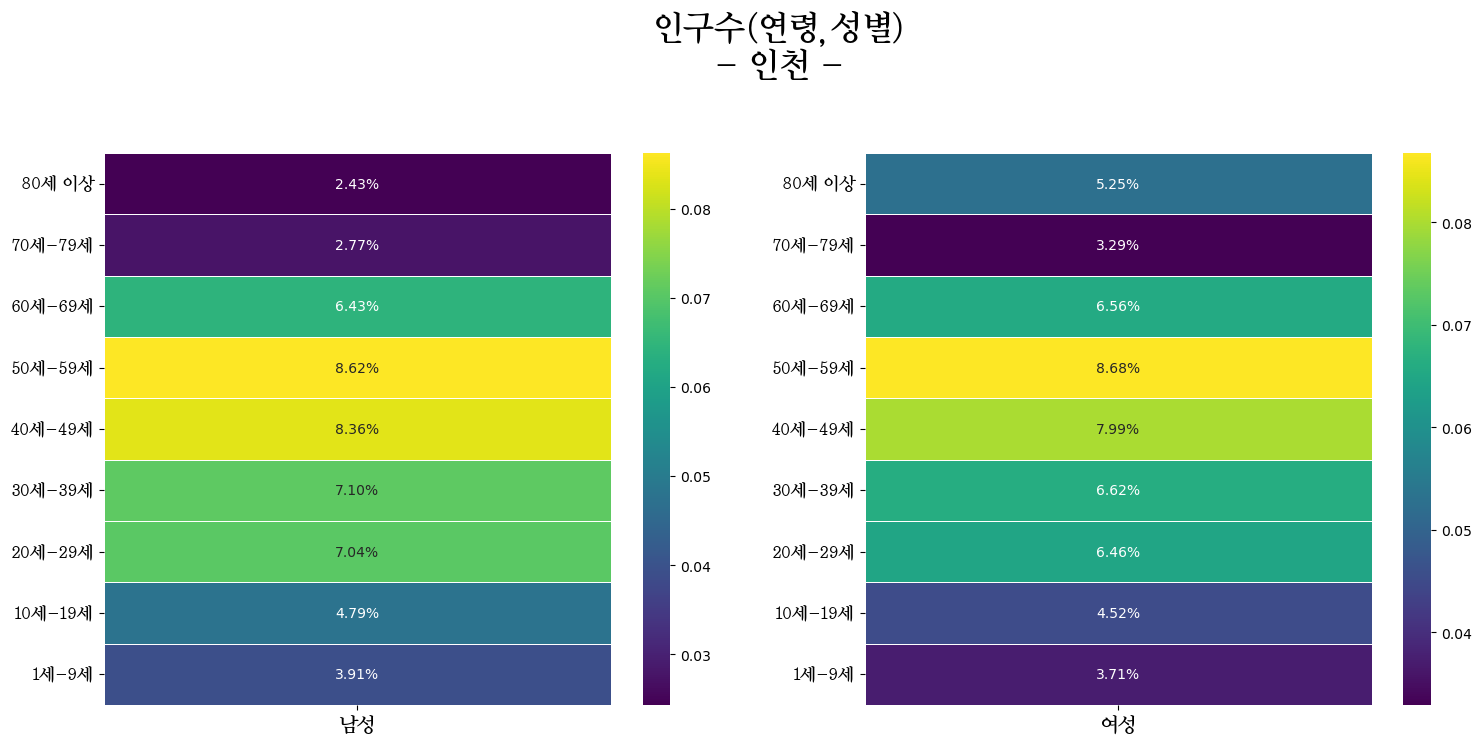

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# 한글 폰트 경로 지정
font_path = '/Users/mac/Desktop/빅데이터 프로젝트/project data/KBIZ한마음명조 B.otf'
font_prop = font_manager.FontProperties(fname=font_path)

# 데이터프레임 생성
data_m = {
    '남성': incheon_m[1:] / (incheon_m[0]+incheon_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

data_w = {
    '여성': incheon_w[1:] / (incheon_m[0]+incheon_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

df_m = pd.DataFrame(data_m)
df_w = pd.DataFrame(data_w)

# 데이터 뒤집기
df_m = df_m.iloc[::-1]
df_w = df_w.iloc[::-1]

# 나이 그룹 레이블 설정
age_labels = ['80세 이상', '70세-79세', '60세-69세', '50세-59세', '40세-49세', '30세-39세', '20세-29세', '10세-19세', '1세-9세']
df_m.index = age_labels
df_w.index = age_labels

# 색상 맵 및 정규화
cmap = plt.get_cmap('viridis')
normalize_m = plt.Normalize(vmin=df_m.values.min(), vmax=df_m.values.max())
normalize_w = plt.Normalize(vmin=df_w.values.min(), vmax=df_w.values.max())

colors_m = [cmap(normalize_m(value)) for value in df_m.values.flatten()]
colors_w = [cmap(normalize_w(value)) for value in df_w.values.flatten()]

# 플롯 설정
fig, ax = plt.subplots(1, 2, figsize=(18, 8))  # 1행 2열로 subplot 생성

# seaborn의 heatmap 사용
heatmap_m = sns.heatmap(df_m, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[0])
heatmap_w = sns.heatmap(df_w, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[1])

# 공통된 title 설정
fig.suptitle('인구수(연령,성별)\n- 인천 -\n', fontproperties=font_prop, fontsize=25, fontweight='bold')

# y축 레이블 설정 (비율은 이미 플롯 안에 표시되므로 생략)
for a in ax:
    a.set_yticklabels(df_m.index, rotation=0, fontproperties=font_prop, fontweight='bold', fontsize=13)  # y축 레이블에 나이 그룹 표시

# 컬럼 이름에 한글 폰트 적용
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), fontproperties=font_prop, fontsize=15, fontweight='bold')

# 타이틀과 그래프 사이에 여백 추가
plt.subplots_adjust(top=0.8)

plt.show()


In [17]:
gwanju_m = [df.iloc[16:17,3:4],df.iloc[16:17,6:7],df.iloc[16:17,9:10],df.iloc[16:17,12:13],df.iloc[16:17,15:16],df.iloc[16:17,18:19],df.iloc[16:17,21:22],df.iloc[16:17,24:25],df.iloc[16:17,27:28],df.iloc[16:17,35:36]]
gwanju_m = [value for df in gwanju_m for value in df.values[0]]
print(gwanju_m)

gwanju_w = [df.iloc[17:18,3:4],df.iloc[17:18,6:7],df.iloc[17:18,9:10],df.iloc[17:18,12:13],df.iloc[17:18,15:16],df.iloc[17:18,18:19],df.iloc[17:18,21:22],df.iloc[17:18,24:25],df.iloc[14:15,27:28],df.iloc[17:18,35:36]]
gwanju_w = [value for df in gwanju_w for value in df.values[0]]
print(gwanju_w)


[711441.0, 59989.0, 80094.5, 108288.5, 93287.5, 117572.5, 115402.5, 79452.5, 41509.0, 37104.5]
[727426.5, 56866.5, 74549.5, 99168.5, 89356.0, 119348.5, 117645.5, 87334.0, 96071.0, 76496.0]


/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.

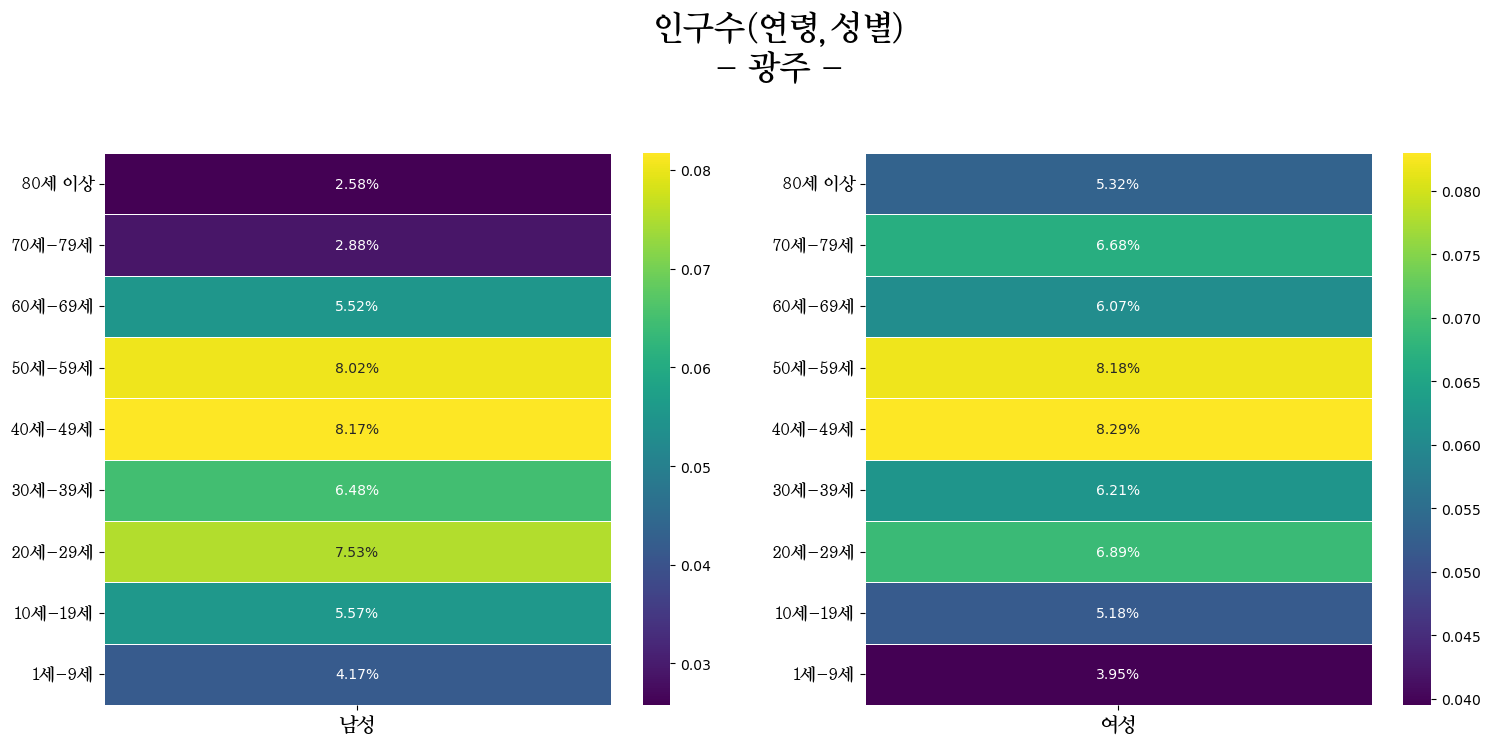

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# 한글 폰트 경로 지정
font_path = '/Users/mac/Desktop/빅데이터 프로젝트/project data/KBIZ한마음명조 B.otf'
font_prop = font_manager.FontProperties(fname=font_path)

# 데이터프레임 생성
data_m = {
    '남성': gwanju_m[1:] / (gwanju_m[0]+gwanju_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

data_w = {
    '여성': gwanju_w[1:] / (gwanju_m[0]+gwanju_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

df_m = pd.DataFrame(data_m)
df_w = pd.DataFrame(data_w)

# 데이터 뒤집기
df_m = df_m.iloc[::-1]
df_w = df_w.iloc[::-1]

# 나이 그룹 레이블 설정
age_labels = ['80세 이상', '70세-79세', '60세-69세', '50세-59세', '40세-49세', '30세-39세', '20세-29세', '10세-19세', '1세-9세']
df_m.index = age_labels
df_w.index = age_labels

# 색상 맵 및 정규화
cmap = plt.get_cmap('viridis')
normalize_m = plt.Normalize(vmin=df_m.values.min(), vmax=df_m.values.max())
normalize_w = plt.Normalize(vmin=df_w.values.min(), vmax=df_w.values.max())

colors_m = [cmap(normalize_m(value)) for value in df_m.values.flatten()]
colors_w = [cmap(normalize_w(value)) for value in df_w.values.flatten()]

# 플롯 설정
fig, ax = plt.subplots(1, 2, figsize=(18, 8))  # 1행 2열로 subplot 생성

# seaborn의 heatmap 사용
heatmap_m = sns.heatmap(df_m, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[0])
heatmap_w = sns.heatmap(df_w, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[1])

# 공통된 title 설정
fig.suptitle('인구수(연령,성별)\n- 광주 -\n', fontproperties=font_prop, fontsize=25, fontweight='bold')

# y축 레이블 설정 (비율은 이미 플롯 안에 표시되므로 생략)
for a in ax:
    a.set_yticklabels(df_m.index, rotation=0, fontproperties=font_prop, fontweight='bold', fontsize=13)  # y축 레이블에 나이 그룹 표시

# 컬럼 이름에 한글 폰트 적용
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), fontproperties=font_prop, fontsize=15, fontweight='bold')

# 타이틀과 그래프 사이에 여백 추가
plt.subplots_adjust(top=0.8)

plt.show()


In [19]:
dejun_m = [df.iloc[19:20,3:4],df.iloc[19:20,6:7],df.iloc[19:20,9:10],df.iloc[19:20,12:13],df.iloc[19:20,15:16],df.iloc[19:20,18:19],df.iloc[19:20,21:22],df.iloc[19:20,24:25],df.iloc[19:20,27:28],df.iloc[19:20,35:36]]
dejun_m = [value for df in dejun_m for value in df.values[0]]
print(dejun_m)

dejun_w = [df.iloc[20:21,3:4],df.iloc[20:21,6:7],df.iloc[20:21,9:10],df.iloc[20:21,12:13],df.iloc[20:21,15:16],df.iloc[20:21,18:19],df.iloc[20:21,21:22],df.iloc[20:21,24:25],df.iloc[20:21,27:28],df.iloc[20:21,35:36]]
dejun_w = [value for df in dejun_w for value in df.values[0]]
print(dejun_w)


[722810.0, 57034.5, 74565.5, 110165.0, 99682.0, 115524.0, 118924.5, 88959.5, 41585.0, 38589.5]
[726818.0, 53962.5, 69568.0, 100103.5, 91057.0, 116705.5, 119821.0, 94524.5, 49784.0, 77087.0]


/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.

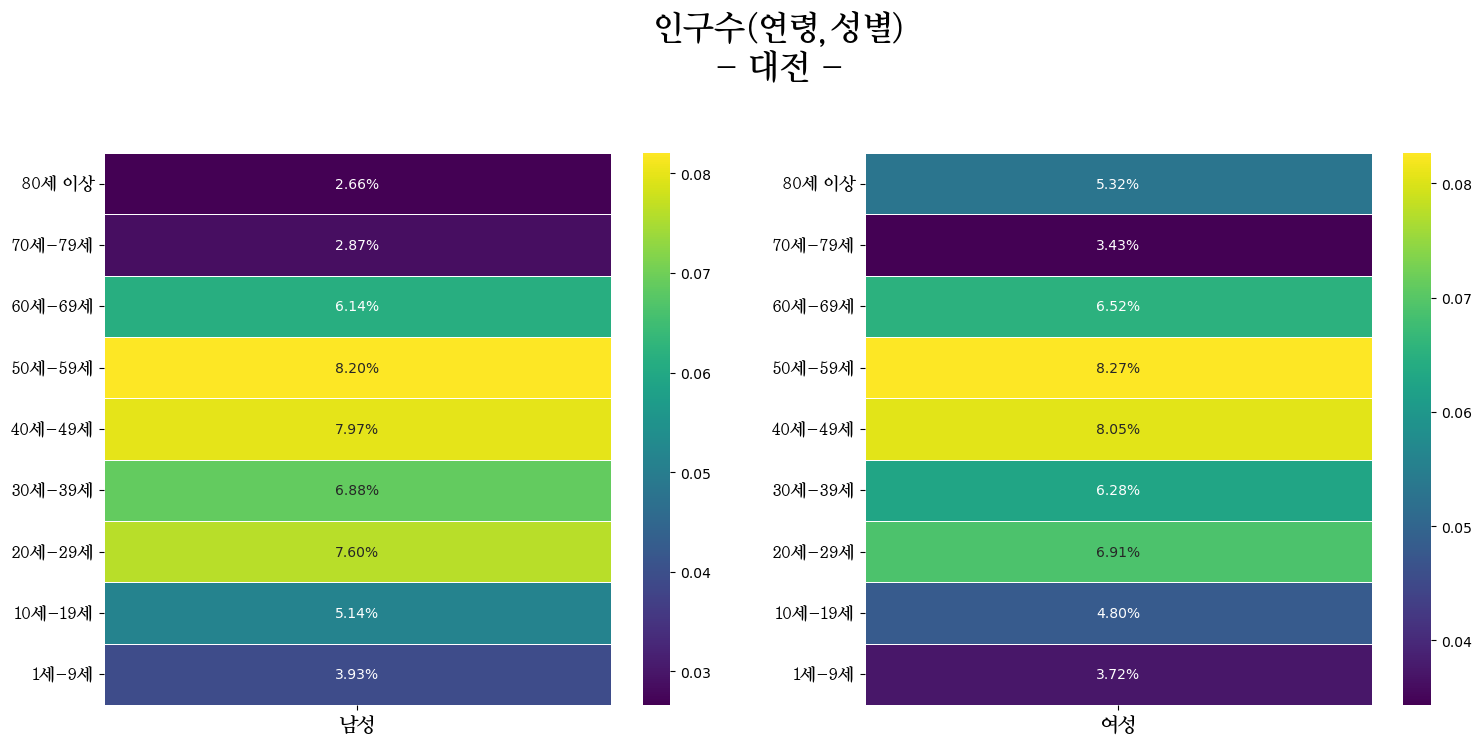

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# 한글 폰트 경로 지정
font_path = '/Users/mac/Desktop/빅데이터 프로젝트/project data/KBIZ한마음명조 B.otf'
font_prop = font_manager.FontProperties(fname=font_path)

# 데이터프레임 생성
data_m = {
    '남성': dejun_m[1:] / (dejun_m[0]+dejun_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

data_w = {
    '여성': dejun_w[1:] / (dejun_m[0]+dejun_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

df_m = pd.DataFrame(data_m)
df_w = pd.DataFrame(data_w)

# 데이터 뒤집기
df_m = df_m.iloc[::-1]
df_w = df_w.iloc[::-1]

# 나이 그룹 레이블 설정
age_labels = ['80세 이상', '70세-79세', '60세-69세', '50세-59세', '40세-49세', '30세-39세', '20세-29세', '10세-19세', '1세-9세']
df_m.index = age_labels
df_w.index = age_labels

# 색상 맵 및 정규화
cmap = plt.get_cmap('viridis')
normalize_m = plt.Normalize(vmin=df_m.values.min(), vmax=df_m.values.max())
normalize_w = plt.Normalize(vmin=df_w.values.min(), vmax=df_w.values.max())

colors_m = [cmap(normalize_m(value)) for value in df_m.values.flatten()]
colors_w = [cmap(normalize_w(value)) for value in df_w.values.flatten()]

# 플롯 설정
fig, ax = plt.subplots(1, 2, figsize=(18, 8))  # 1행 2열로 subplot 생성

# seaborn의 heatmap 사용
heatmap_m = sns.heatmap(df_m, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[0])
heatmap_w = sns.heatmap(df_w, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[1])

# 공통된 title 설정
fig.suptitle('인구수(연령,성별)\n- 대전 -\n', fontproperties=font_prop, fontsize=25, fontweight='bold')

# y축 레이블 설정 (비율은 이미 플롯 안에 표시되므로 생략)
for a in ax:
    a.set_yticklabels(df_m.index, rotation=0, fontproperties=font_prop, fontweight='bold', fontsize=13)  # y축 레이블에 나이 그룹 표시

# 컬럼 이름에 한글 폰트 적용
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), fontproperties=font_prop, fontsize=15, fontweight='bold')

# 타이틀과 그래프 사이에 여백 추가
plt.subplots_adjust(top=0.8)
plt.show()


In [21]:
ulsan_m = [df.iloc[22:23,3:4],df.iloc[22:23,6:7],df.iloc[22:23,9:10],df.iloc[22:23,12:13],df.iloc[22:23,15:16],df.iloc[22:23,18:19],df.iloc[22:23,21:22],df.iloc[22:23,24:25],df.iloc[22:23,27:28],df.iloc[22:23,35:36]]
ulsan_m = [value for df in ulsan_m for value in df.values[0]]
print(ulsan_m)

ulsan_w = [df.iloc[23:24,3:4],df.iloc[23:24,6:7],df.iloc[23:24,9:10],df.iloc[23:24,12:13],df.iloc[23:24,15:16],df.iloc[23:24,18:19],df.iloc[23:24,21:22],df.iloc[23:24,24:25],df.iloc[23:24,27:28],df.iloc[23:24,35:36]]
ulsan_w = [value for df in ulsan_w for value in df.values[0]]
print(ulsan_w)


[577173.5, 48952.5, 58420.5, 79221.0, 78442.5, 94140.5, 105075.5, 75387.5, 29209.0, 19282.5]
[546867.0, 46281.0, 52718.0, 61496.0, 69198.0, 90572.0, 101981.5, 74385.0, 32108.5, 44541.5]


/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.

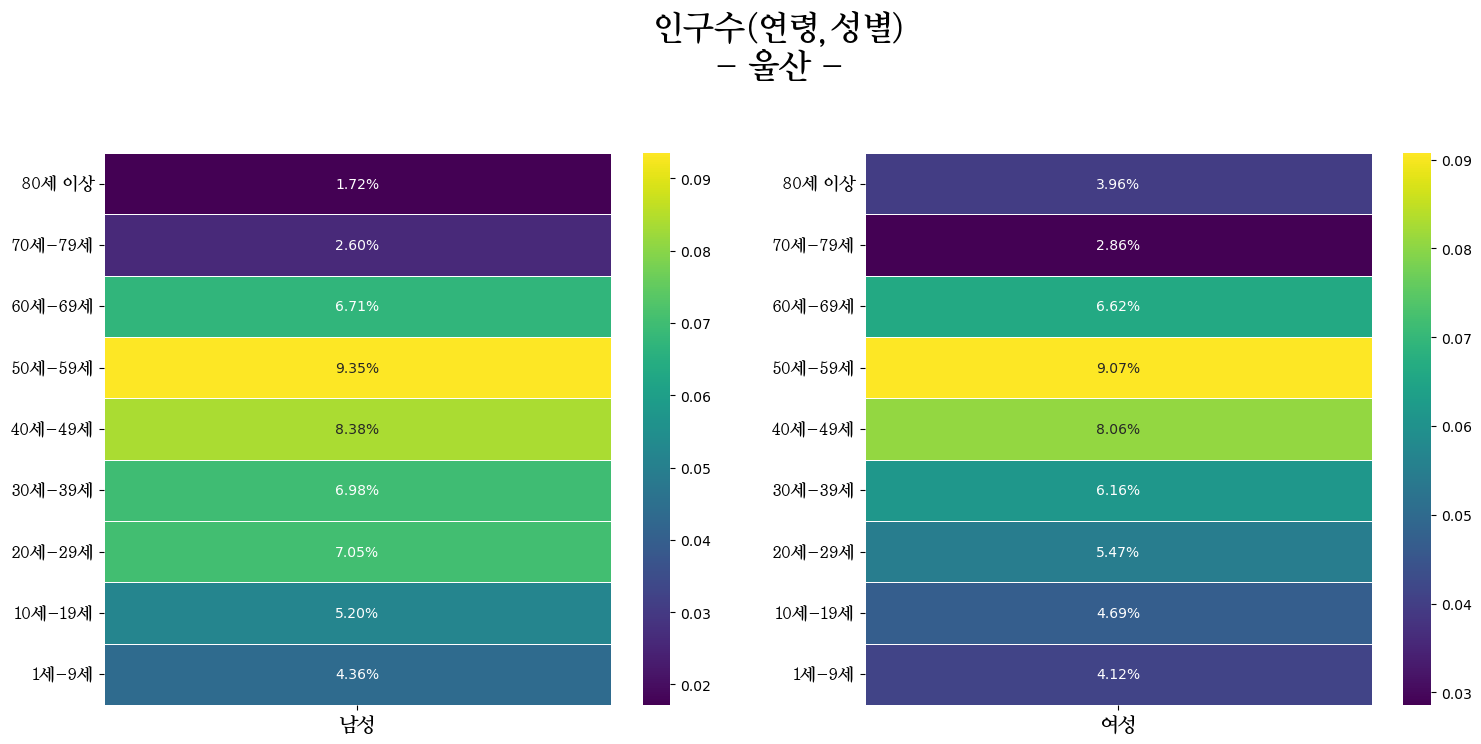

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# 한글 폰트 경로 지정
font_path = '/Users/mac/Desktop/빅데이터 프로젝트/project data/KBIZ한마음명조 B.otf'
font_prop = font_manager.FontProperties(fname=font_path)

# 데이터프레임 생성
data_m = {
    '남성': ulsan_m[1:] / (ulsan_m[0]+ulsan_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

data_w = {
    '여성': ulsan_w[1:] / (ulsan_m[0]+ulsan_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

df_m = pd.DataFrame(data_m)
df_w = pd.DataFrame(data_w)

# 데이터 뒤집기
df_m = df_m.iloc[::-1]
df_w = df_w.iloc[::-1]

# 나이 그룹 레이블 설정
age_labels = ['80세 이상', '70세-79세', '60세-69세', '50세-59세', '40세-49세', '30세-39세', '20세-29세', '10세-19세', '1세-9세']
df_m.index = age_labels
df_w.index = age_labels

# 색상 맵 및 정규화
cmap = plt.get_cmap('viridis')
normalize_m = plt.Normalize(vmin=df_m.values.min(), vmax=df_m.values.max())
normalize_w = plt.Normalize(vmin=df_w.values.min(), vmax=df_w.values.max())

colors_m = [cmap(normalize_m(value)) for value in df_m.values.flatten()]
colors_w = [cmap(normalize_w(value)) for value in df_w.values.flatten()]

# 플롯 설정
fig, ax = plt.subplots(1, 2, figsize=(18, 8))  # 1행 2열로 subplot 생성

# seaborn의 heatmap 사용
heatmap_m = sns.heatmap(df_m, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[0])
heatmap_w = sns.heatmap(df_w, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[1])

# 공통된 title 설정
fig.suptitle('인구수(연령,성별)\n- 울산 -\n', fontproperties=font_prop, fontsize=25, fontweight='bold')

# y축 레이블 설정 (비율은 이미 플롯 안에 표시되므로 생략)
for a in ax:
    a.set_yticklabels(df_m.index, rotation=0, fontproperties=font_prop, fontweight='bold', fontsize=13)  # y축 레이블에 나이 그룹 표시

# 컬럼 이름에 한글 폰트 적용
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), fontproperties=font_prop, fontsize=15, fontweight='bold')

# 타이틀과 그래프 사이에 여백 추가
plt.subplots_adjust(top=0.8)
plt.show()


In [25]:
sejong_m = [df.iloc[25:26,3:4],df.iloc[25:26,6:7],df.iloc[25:26,9:10],df.iloc[25:26,12:13],df.iloc[25:26,15:16],df.iloc[25:26,18:19],df.iloc[25:26,21:22],df.iloc[25:26,24:25],df.iloc[25:26,27:28],df.iloc[25:26,35:36]]
sejong_m = [value for df in sejong_m for value in df.values[0]]
print(sejong_m)

sejong_w = [df.iloc[26:27,3:4],df.iloc[26:27,6:7],df.iloc[26:27,9:10],df.iloc[26:27,12:13],df.iloc[26:27,15:16],df.iloc[26:27,18:19],df.iloc[26:27,21:22],df.iloc[26:27,24:25],df.iloc[26:27,27:28],df.iloc[26:27,35:36]]
sejong_w = [value for df in sejong_w for value in df.values[0]]
print(sejong_w)


[181134.5, 24082.0, 22247.0, 19361.0, 30003.5, 35891.0, 24415.0, 15681.5, 6703.5, 6565.5]
[181787.0, 23082.5, 21980.5, 18577.0, 31469.5, 34686.5, 22401.0, 15988.5, 7809.5, 14537.0]


/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.

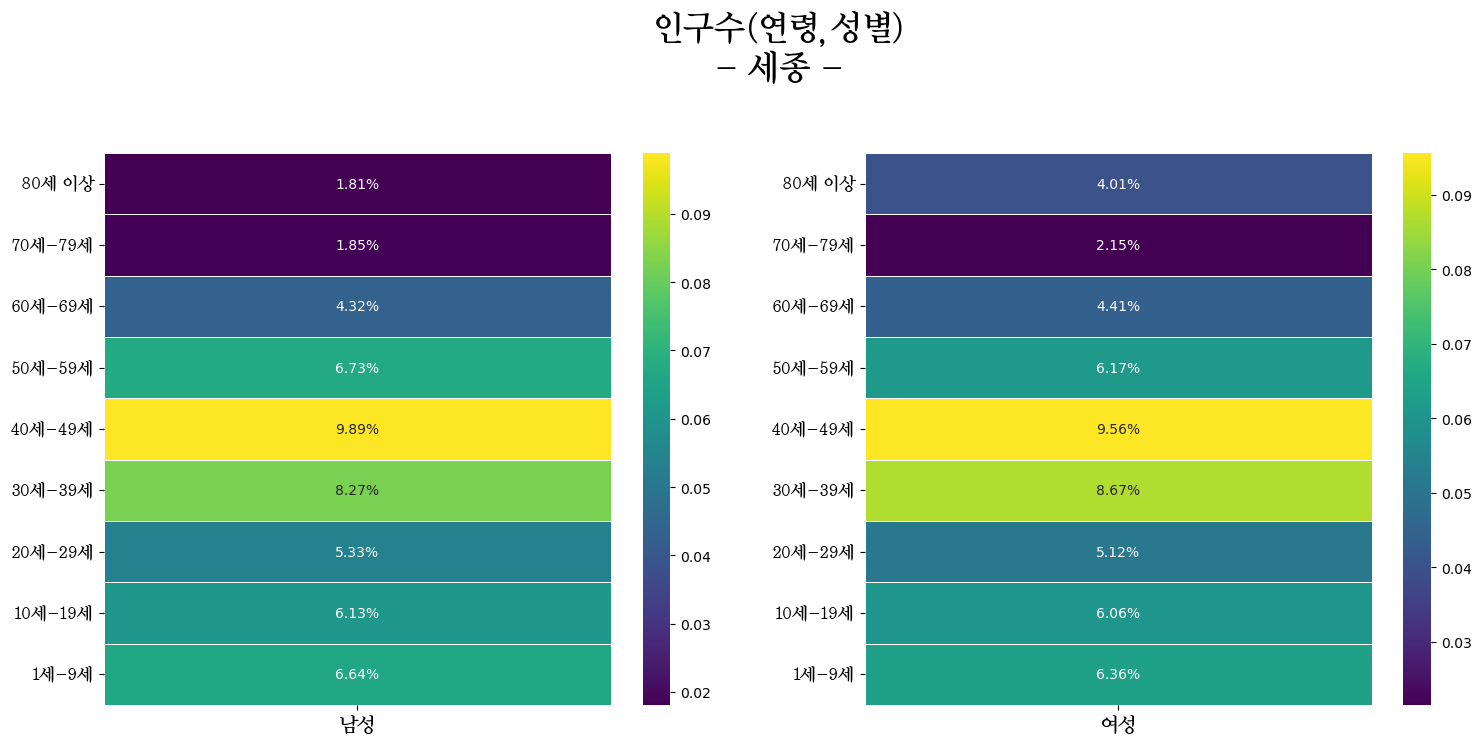

In [27]:
data_m = {
    '남성': sejong_m[1:] / (sejong_m[0]+sejong_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

data_w = {
    '여성': sejong_w[1:] / (sejong_m[0]+sejong_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

df_m = pd.DataFrame(data_m)
df_w = pd.DataFrame(data_w)

# 데이터 뒤집기
df_m = df_m.iloc[::-1]
df_w = df_w.iloc[::-1]

# 나이 그룹 레이블 설정
age_labels = ['80세 이상', '70세-79세', '60세-69세', '50세-59세', '40세-49세', '30세-39세', '20세-29세', '10세-19세', '1세-9세']
df_m.index = age_labels
df_w.index = age_labels

# 색상 맵 및 정규화
cmap = plt.get_cmap('viridis')
normalize_m = plt.Normalize(vmin=df_m.values.min(), vmax=df_m.values.max())
normalize_w = plt.Normalize(vmin=df_w.values.min(), vmax=df_w.values.max())

colors_m = [cmap(normalize_m(value)) for value in df_m.values.flatten()]
colors_w = [cmap(normalize_w(value)) for value in df_w.values.flatten()]

# 플롯 설정
fig, ax = plt.subplots(1, 2, figsize=(18, 8))  # 1행 2열로 subplot 생성

# seaborn의 heatmap 사용
heatmap_m = sns.heatmap(df_m, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[0])
heatmap_w = sns.heatmap(df_w, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[1])

# 공통된 title 설정
fig.suptitle('인구수(연령,성별)\n- 세종 -\n', fontproperties=font_prop, fontsize=25, fontweight='bold')

# y축 레이블 설정 (비율은 이미 플롯 안에 표시되므로 생략)
for a in ax:
    a.set_yticklabels(df_m.index, rotation=0, fontproperties=font_prop, fontweight='bold', fontsize=13)  # y축 레이블에 나이 그룹 표시

# 컬럼 이름에 한글 폰트 적용
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), fontproperties=font_prop, fontsize=15, fontweight='bold')

# 타이틀과 그래프 사이에 여백 추가
plt.subplots_adjust(top=0.8)
plt.show()


In [29]:
geongi_m = [df.iloc[28:29,3:4],df.iloc[28:29,6:7],df.iloc[28:29,9:10],df.iloc[28:29,12:13],df.iloc[28:29,15:16],df.iloc[28:29,18:19],df.iloc[28:29,21:22],df.iloc[28:29,24:25],df.iloc[28:29,27:28],df.iloc[28:29,35:36]]
geongi_m = [value for df in geongi_m for value in df.values[0]]
print(geongi_m)

geongi_w = [df.iloc[29:39,3:4],df.iloc[29:30,6:7],df.iloc[29:30,9:10],df.iloc[29:30,12:13],df.iloc[29:30,15:16],df.iloc[29:30,18:19],df.iloc[29:30,21:22],df.iloc[29:30,24:25],df.iloc[29:30,27:28],df.iloc[29:30,35:36]]
geongi_w = [value for df in geongi_w for value in df.values[0]]
print(geongi_w)


[6740110.0, 574436.5, 679016.0, 946154.5, 977260.5, 1157634.5, 1128187.5, 787160.0, 347172.0, 337507.0]
[6658835.0, 547850.0, 642640.0, 849764.5, 915238.5, 1120471.0, 1101691.0, 796524.0, 415987.5, 661735.0]


/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.

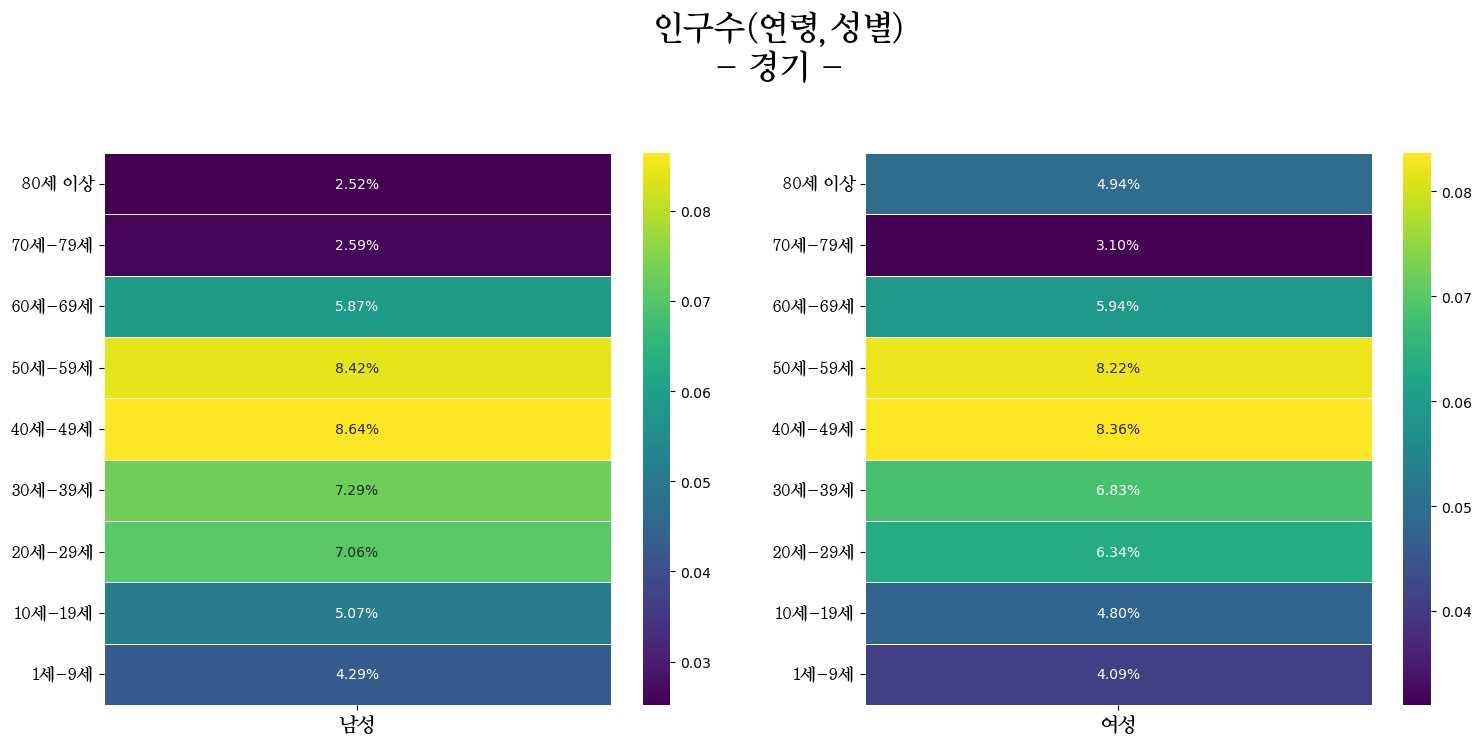

In [30]:
data_m = {
    '남성': geongi_m[1:] / (geongi_m[0]+geongi_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

data_w = {
    '여성': geongi_w[1:] / (geongi_m[0]+geongi_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

df_m = pd.DataFrame(data_m)
df_w = pd.DataFrame(data_w)

# 데이터 뒤집기
df_m = df_m.iloc[::-1]
df_w = df_w.iloc[::-1]

# 나이 그룹 레이블 설정
age_labels = ['80세 이상', '70세-79세', '60세-69세', '50세-59세', '40세-49세', '30세-39세', '20세-29세', '10세-19세', '1세-9세']
df_m.index = age_labels
df_w.index = age_labels

# 색상 맵 및 정규화
cmap = plt.get_cmap('viridis')
normalize_m = plt.Normalize(vmin=df_m.values.min(), vmax=df_m.values.max())
normalize_w = plt.Normalize(vmin=df_w.values.min(), vmax=df_w.values.max())

colors_m = [cmap(normalize_m(value)) for value in df_m.values.flatten()]
colors_w = [cmap(normalize_w(value)) for value in df_w.values.flatten()]

# 플롯 설정
fig, ax = plt.subplots(1, 2, figsize=(18, 8))  # 1행 2열로 subplot 생성

# seaborn의 heatmap 사용
heatmap_m = sns.heatmap(df_m, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[0])
heatmap_w = sns.heatmap(df_w, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[1])

# 공통된 title 설정
fig.suptitle('인구수(연령,성별)\n- 경기 -\n', fontproperties=font_prop, fontsize=25, fontweight='bold')

# y축 레이블 설정 (비율은 이미 플롯 안에 표시되므로 생략)
for a in ax:
    a.set_yticklabels(df_m.index, rotation=0, fontproperties=font_prop, fontweight='bold', fontsize=13)  # y축 레이블에 나이 그룹 표시

# 컬럼 이름에 한글 폰트 적용
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), fontproperties=font_prop, fontsize=15, fontweight='bold')

# 타이틀과 그래프 사이에 여백 추가
plt.subplots_adjust(top=0.8)
plt.show()


In [46]:
gangwon_m = [df.iloc[31:32,3:4],df.iloc[31:32,6:7],df.iloc[31:32,9:10],df.iloc[31:32,12:13],df.iloc[31:32,15:16],df.iloc[31:32,18:19],df.iloc[31:32,21:22],df.iloc[31:32,24:25],df.iloc[31:32,27:28],df.iloc[31:32,35:36]]
gangwon_m = [value for df in gangwon_m for value in df.values[0]]
print(gangwon_m)

gangwon_w = [df.iloc[32:33,3:4],df.iloc[32:33,6:7],df.iloc[32:33,9:10],df.iloc[32:33,12:13],df.iloc[32:33,15:16],df.iloc[32:33,18:19],df.iloc[32:33,21:22],df.iloc[32:33,24:25],df.iloc[32:33,27:28],df.iloc[32:33,35:36]]
gangwon_w = [value for df in gangwon_w for value in df.values[0]]
print(gangwon_w)


[770403.0, 52798.0, 70498.0, 99705.5, 86074.0, 112856.5, 135858.5, 124066.5, 59845.5, 67108.5]
[760133.5, 50448.5, 65021.5, 77437.5, 77437.5, 107167.0, 127919.0, 124776.0, 73290.0, 139177.0]


/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.

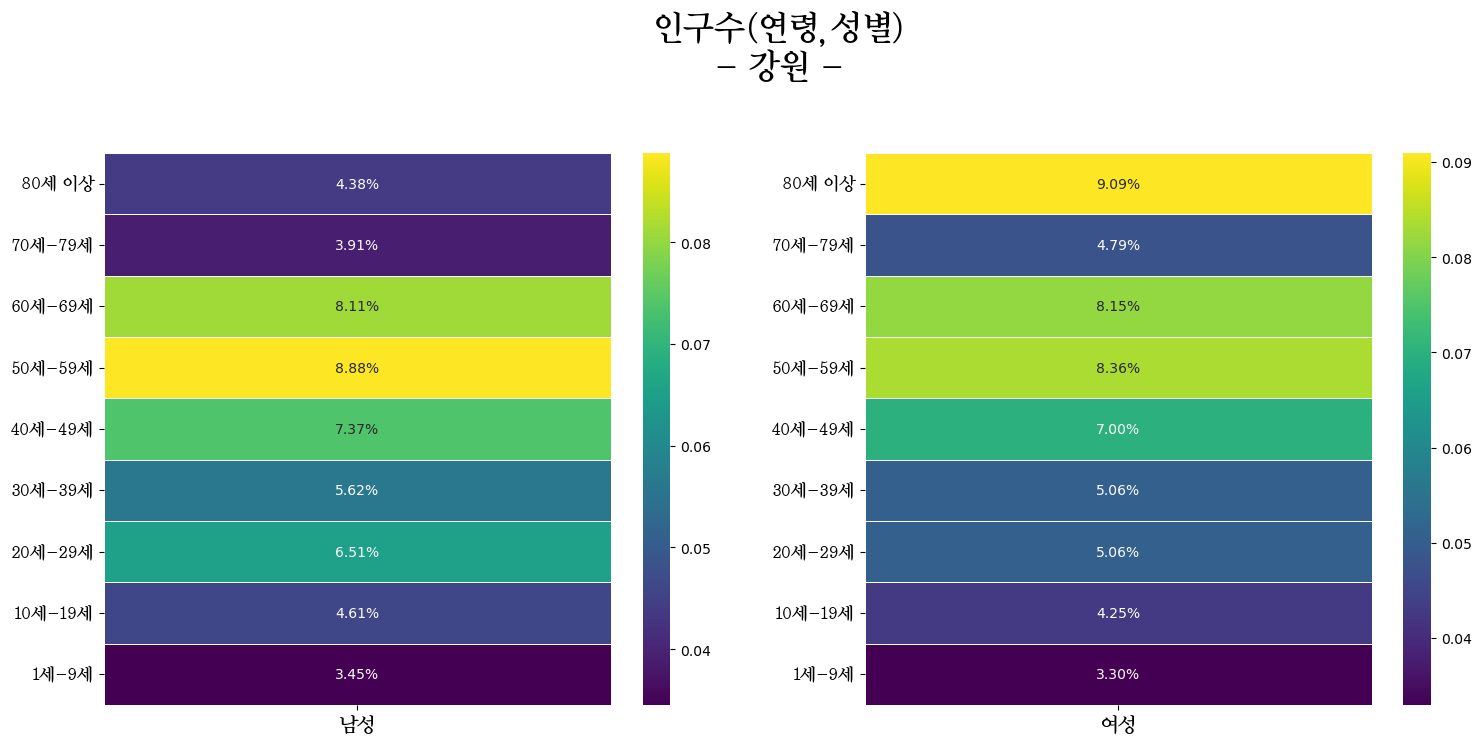

In [49]:
data_m = {
    '남성': gangwon_m[1:] / (gangwon_m[0]+gangwon_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

data_w = {
    '여성': gangwon_w[1:] / (gangwon_m[0]+gangwon_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

df_m = pd.DataFrame(data_m)
df_w = pd.DataFrame(data_w)

# 데이터 뒤집기
df_m = df_m.iloc[::-1]
df_w = df_w.iloc[::-1]

# 나이 그룹 레이블 설정
age_labels = ['80세 이상', '70세-79세', '60세-69세', '50세-59세', '40세-49세', '30세-39세', '20세-29세', '10세-19세', '1세-9세']
df_m.index = age_labels
df_w.index = age_labels

# 색상 맵 및 정규화
cmap = plt.get_cmap('viridis')
normalize_m = plt.Normalize(vmin=df_m.values.min(), vmax=df_m.values.max())
normalize_w = plt.Normalize(vmin=df_w.values.min(), vmax=df_w.values.max())

colors_m = [cmap(normalize_m(value)) for value in df_m.values.flatten()]
colors_w = [cmap(normalize_w(value)) for value in df_w.values.flatten()]

# 플롯 설정
fig, ax = plt.subplots(1, 2, figsize=(18, 8))  # 1행 2열로 subplot 생성

# seaborn의 heatmap 사용
heatmap_m = sns.heatmap(df_m, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[0])
heatmap_w = sns.heatmap(df_w, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[1])

# 공통된 title 설정
fig.suptitle('인구수(연령,성별)\n- 강원 -\n', fontproperties=font_prop, fontsize=25, fontweight='bold')

# y축 레이블 설정 (비율은 이미 플롯 안에 표시되므로 생략)
for a in ax:
    a.set_yticklabels(df_m.index, rotation=0, fontproperties=font_prop, fontweight='bold', fontsize=13)  # y축 레이블에 나이 그룹 표시

# 컬럼 이름에 한글 폰트 적용
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), fontproperties=font_prop, fontsize=15, fontweight='bold')

# 타이틀과 그래프 사이에 여백 추가
plt.subplots_adjust(top=0.8)
plt.show()


In [36]:
chungbuk_m = [df.iloc[34:35,3:4],df.iloc[34:35,6:7],df.iloc[34:35,9:10],df.iloc[34:35,12:13],df.iloc[34:35,15:16],df.iloc[34:35,18:19],df.iloc[34:35,21:22],df.iloc[34:35,24:25],df.iloc[34:35,27:28],df.iloc[34:35,35:36]]
chungbuk_m = [value for df in chungbuk_m for value in df.values[0]]
print(chungbuk_m)

chungbuk_w = [df.iloc[35:36,3:4],df.iloc[35:36,6:7],df.iloc[35:36,9:10],df.iloc[35:36,12:13],df.iloc[35:36,15:16],df.iloc[35:36,18:19],df.iloc[35:36,21:22],df.iloc[35:36,24:25],df.iloc[35:36,27:28],df.iloc[35:36,35:36]]
chungbuk_w = [value for df in chungbuk_w for value in df.values[0]]
print(chungbuk_w)


[806851.5, 61380.0, 76814.5, 109278.5, 102026.0, 122962.0, 139094.0, 115921.5, 54215.0, 59358.0]
[784394.5, 58758.5, 70958.0, 86974.0, 89563.5, 114583.5, 131239.0, 115319.0, 65559.0, 127030.5]


/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.

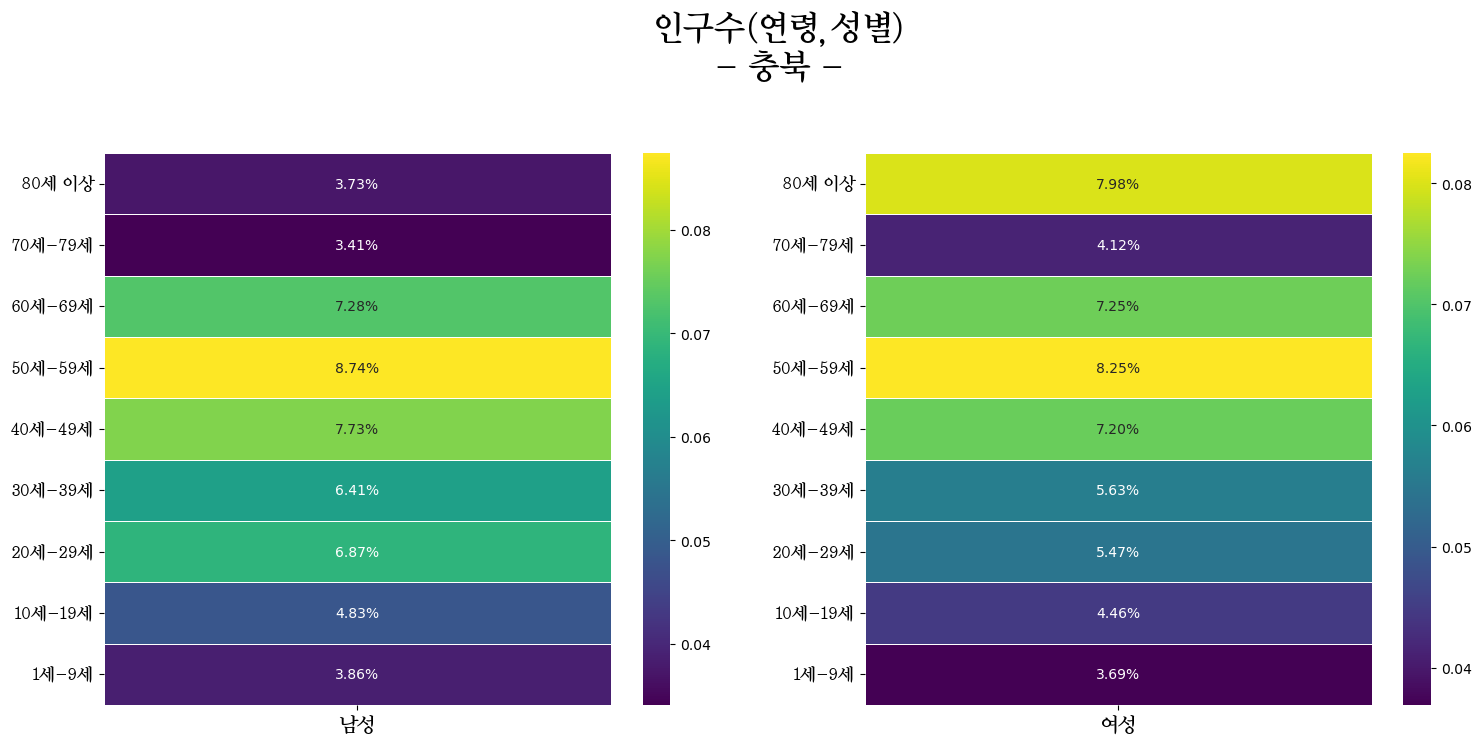

In [50]:
data_m = {
    '남성': chungbuk_m[1:] / (chungbuk_m[0]+chungbuk_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

data_w = {
    '여성': chungbuk_w[1:] / (chungbuk_m[0]+chungbuk_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

df_m = pd.DataFrame(data_m)
df_w = pd.DataFrame(data_w)

# 데이터 뒤집기
df_m = df_m.iloc[::-1]
df_w = df_w.iloc[::-1]

# 나이 그룹 레이블 설정
age_labels = ['80세 이상', '70세-79세', '60세-69세', '50세-59세', '40세-49세', '30세-39세', '20세-29세', '10세-19세', '1세-9세']
df_m.index = age_labels
df_w.index = age_labels

# 색상 맵 및 정규화
cmap = plt.get_cmap('viridis')
normalize_m = plt.Normalize(vmin=df_m.values.min(), vmax=df_m.values.max())
normalize_w = plt.Normalize(vmin=df_w.values.min(), vmax=df_w.values.max())

colors_m = [cmap(normalize_m(value)) for value in df_m.values.flatten()]
colors_w = [cmap(normalize_w(value)) for value in df_w.values.flatten()]

# 플롯 설정
fig, ax = plt.subplots(1, 2, figsize=(18, 8))  # 1행 2열로 subplot 생성

# seaborn의 heatmap 사용
heatmap_m = sns.heatmap(df_m, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[0])
heatmap_w = sns.heatmap(df_w, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[1])

# 공통된 title 설정
fig.suptitle('인구수(연령,성별)\n- 충북 -\n', fontproperties=font_prop, fontsize=25, fontweight='bold')

# y축 레이블 설정 (비율은 이미 플롯 안에 표시되므로 생략)
for a in ax:
    a.set_yticklabels(df_m.index, rotation=0, fontproperties=font_prop, fontweight='bold', fontsize=13)  # y축 레이블에 나이 그룹 표시

# 컬럼 이름에 한글 폰트 적용
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), fontproperties=font_prop, fontsize=15, fontweight='bold')

# 타이틀과 그래프 사이에 여백 추가
plt.subplots_adjust(top=0.8)
plt.show()


In [35]:
chungnam_m = [df.iloc[37:38,3:4],df.iloc[37:38,6:7],df.iloc[37:38,9:10],df.iloc[37:38,12:13],df.iloc[37:38,15:16],df.iloc[37:38,18:19],df.iloc[37:38,21:22],df.iloc[37:38,24:25],df.iloc[37:38,27:28],df.iloc[37:38,35:36]]
chungnam_m = [value for df in chungnam_m for value in df.values[0]]
print(chungnam_m)

chungnam_w = [df.iloc[38:39,3:4],df.iloc[38:39,6:7],df.iloc[38:39,9:10],df.iloc[38:39,12:13],df.iloc[38:39,15:16],df.iloc[38:39,18:19],df.iloc[38:39,21:22],df.iloc[38:39,24:25],df.iloc[38:39,27:28],df.iloc[38:39,35:36]]
chungnam_w = [value for df in chungnam_w for value in df.values[0]]
print(chungnam_w)


[1077094.0, 85847.0, 104570.5, 132576.5, 141509.0, 172699.5, 178646.0, 144155.5, 77999.5, 93706.0]
[1032008.0, 81780.5, 96836.5, 107456.0, 121217.5, 151554.5, 158978.0, 143556.5, 92935.0, 193083.0]


/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.

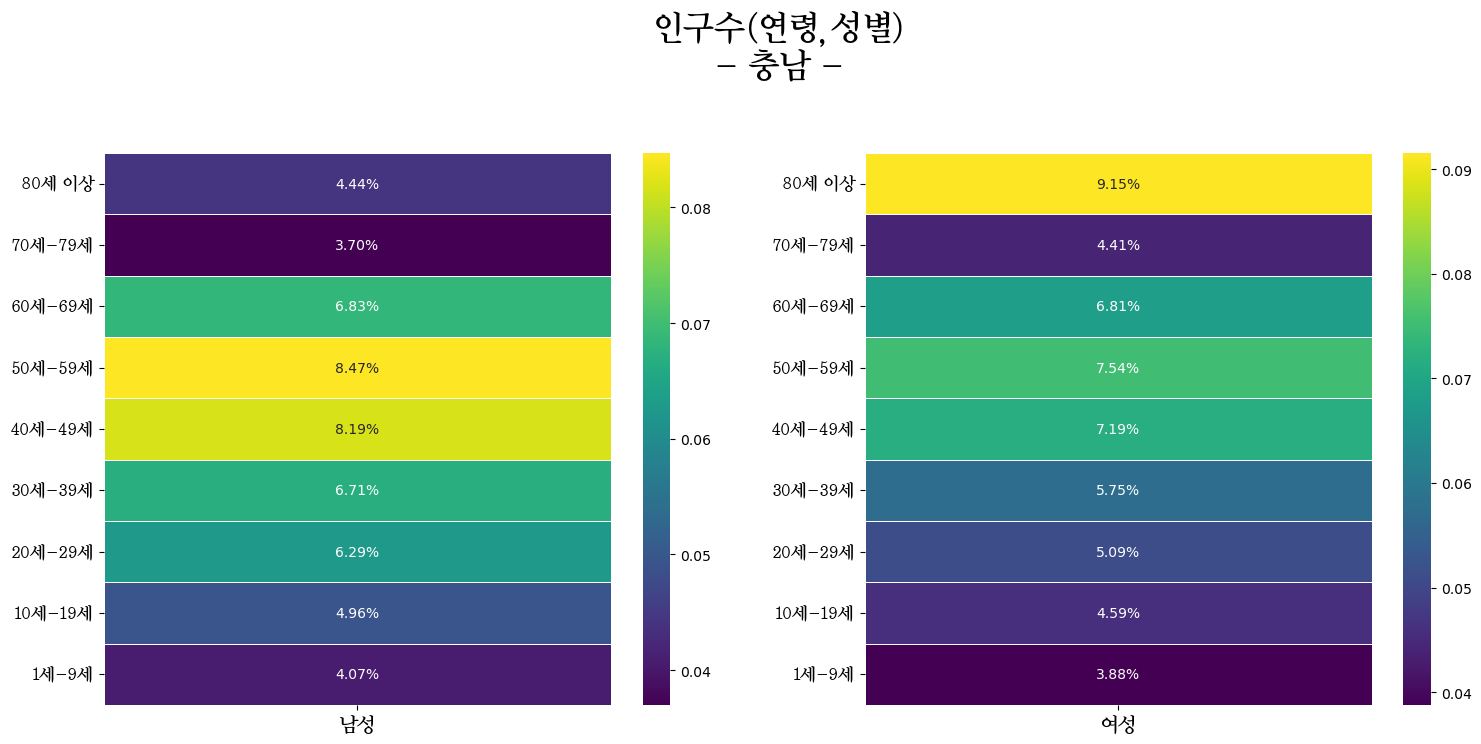

In [51]:
data_m = {
    '남성': chungnam_m[1:] / (chungnam_m[0]+chungnam_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

data_w = {
    '여성': chungnam_w[1:] / (chungnam_m[0]+chungnam_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

df_m = pd.DataFrame(data_m)
df_w = pd.DataFrame(data_w)

# 데이터 뒤집기
df_m = df_m.iloc[::-1]
df_w = df_w.iloc[::-1]

# 나이 그룹 레이블 설정
age_labels = ['80세 이상', '70세-79세', '60세-69세', '50세-59세', '40세-49세', '30세-39세', '20세-29세', '10세-19세', '1세-9세']
df_m.index = age_labels
df_w.index = age_labels

# 색상 맵 및 정규화
cmap = plt.get_cmap('viridis')
normalize_m = plt.Normalize(vmin=df_m.values.min(), vmax=df_m.values.max())
normalize_w = plt.Normalize(vmin=df_w.values.min(), vmax=df_w.values.max())

colors_m = [cmap(normalize_m(value)) for value in df_m.values.flatten()]
colors_w = [cmap(normalize_w(value)) for value in df_w.values.flatten()]

# 플롯 설정
fig, ax = plt.subplots(1, 2, figsize=(18, 8))  # 1행 2열로 subplot 생성

# seaborn의 heatmap 사용
heatmap_m = sns.heatmap(df_m, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[0])
heatmap_w = sns.heatmap(df_w, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[1])

# 공통된 title 설정
fig.suptitle('인구수(연령,성별)\n- 충남 -\n', fontproperties=font_prop, fontsize=25, fontweight='bold')

# y축 레이블 설정 (비율은 이미 플롯 안에 표시되므로 생략)
for a in ax:
    a.set_yticklabels(df_m.index, rotation=0, fontproperties=font_prop, fontweight='bold', fontsize=13)  # y축 레이블에 나이 그룹 표시

# 컬럼 이름에 한글 폰트 적용
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), fontproperties=font_prop, fontsize=15, fontweight='bold')

# 타이틀과 그래프 사이에 여백 추가
plt.subplots_adjust(top=0.8)
plt.show()


In [38]:
jeonbuk_m = [df.iloc[40:41,3:4],df.iloc[40:41,6:7],df.iloc[40:41,9:10],df.iloc[40:41,12:13],df.iloc[40:41,15:16],df.iloc[40:41,18:19],df.iloc[40:41,21:22],df.iloc[40:41,24:25],df.iloc[40:41,27:28],df.iloc[40:41,35:36]]
jeonbuk_m = [value for df in jeonbuk_m for value in df.values[0]]
print(jeonbuk_m)

jeonbuk_w = [df.iloc[41:42,3:4],df.iloc[41:42,6:7],df.iloc[41:42,9:10],df.iloc[41:42,12:13],df.iloc[41:42,15:16],df.iloc[41:42,18:19],df.iloc[41:42,21:22],df.iloc[41:42,24:25],df.iloc[41:42,27:28],df.iloc[41:42,35:36]]
jeonbuk_w = [value for df in jeonbuk_w for value in df.values[0]]
print(jeonbuk_w)


[888453.0, 63721.5, 89255.0, 112642.0, 95243.0, 134960.5, 153907.5, 128838.5, 75295.0, 82436.5]
[897868.5, 60432.0, 83143.5, 95745.5, 89236.5, 127188.0, 143027.5, 131655.5, 94249.0, 181637.0]


/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.

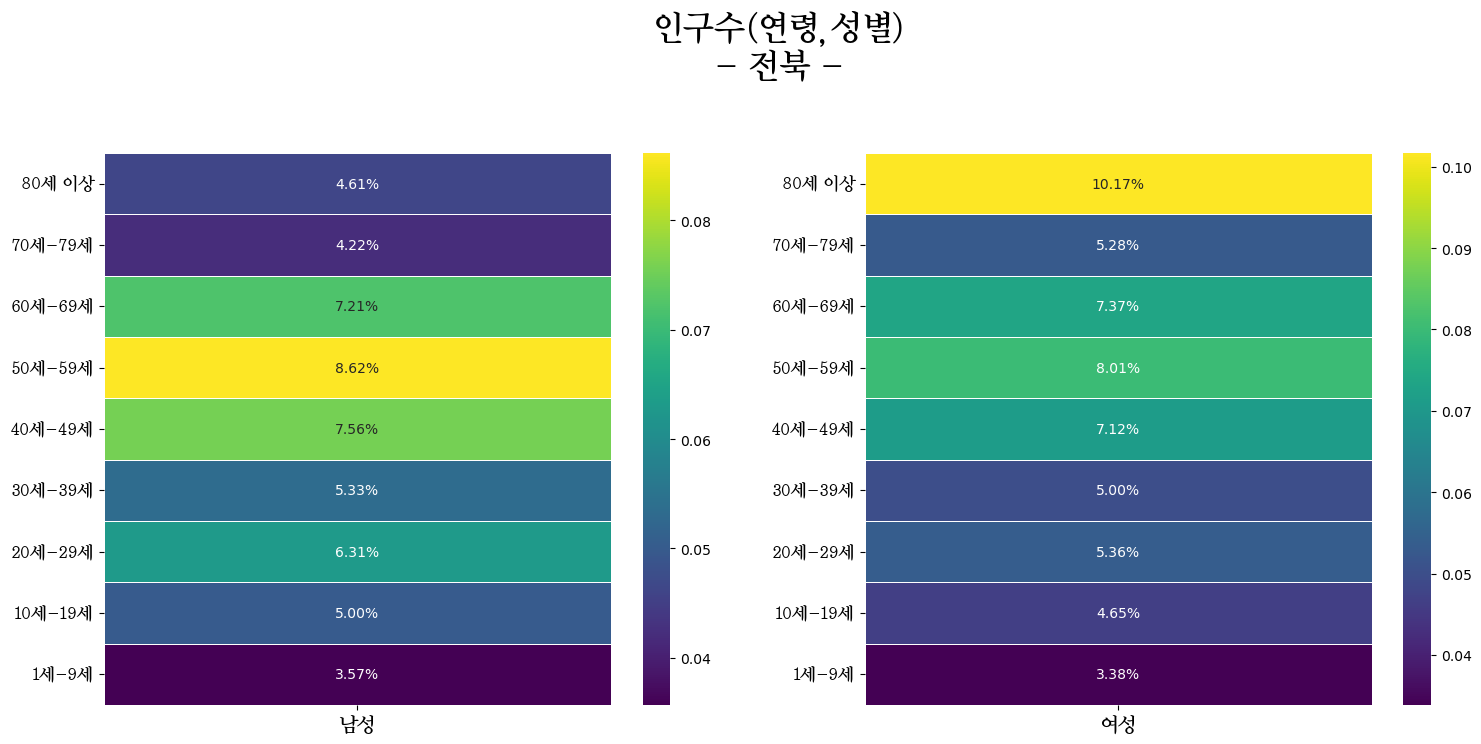

In [52]:
data_m = {
    '남성': jeonbuk_m[1:] / (jeonbuk_m[0]+jeonbuk_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

data_w = {
    '여성': jeonbuk_w[1:] / (jeonbuk_m[0]+jeonbuk_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

df_m = pd.DataFrame(data_m)
df_w = pd.DataFrame(data_w)

# 데이터 뒤집기
df_m = df_m.iloc[::-1]
df_w = df_w.iloc[::-1]

# 나이 그룹 레이블 설정
age_labels = ['80세 이상', '70세-79세', '60세-69세', '50세-59세', '40세-49세', '30세-39세', '20세-29세', '10세-19세', '1세-9세']
df_m.index = age_labels
df_w.index = age_labels

# 색상 맵 및 정규화
cmap = plt.get_cmap('viridis')
normalize_m = plt.Normalize(vmin=df_m.values.min(), vmax=df_m.values.max())
normalize_w = plt.Normalize(vmin=df_w.values.min(), vmax=df_w.values.max())

colors_m = [cmap(normalize_m(value)) for value in df_m.values.flatten()]
colors_w = [cmap(normalize_w(value)) for value in df_w.values.flatten()]

# 플롯 설정
fig, ax = plt.subplots(1, 2, figsize=(18, 8))  # 1행 2열로 subplot 생성

# seaborn의 heatmap 사용
heatmap_m = sns.heatmap(df_m, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[0])
heatmap_w = sns.heatmap(df_w, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[1])

# 공통된 title 설정
fig.suptitle('인구수(연령,성별)\n- 전북 -\n', fontproperties=font_prop, fontsize=25, fontweight='bold')

# y축 레이블 설정 (비율은 이미 플롯 안에 표시되므로 생략)
for a in ax:
    a.set_yticklabels(df_m.index, rotation=0, fontproperties=font_prop, fontweight='bold', fontsize=13)  # y축 레이블에 나이 그룹 표시

# 컬럼 이름에 한글 폰트 적용
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), fontproperties=font_prop, fontsize=15, fontweight='bold')

# 타이틀과 그래프 사이에 여백 추가
plt.subplots_adjust(top=0.8)
plt.show()


In [39]:
jeonnam_m = [df.iloc[43:44,3:4],df.iloc[43:44,6:7],df.iloc[43:44,9:10],df.iloc[43:44,12:13],df.iloc[43:44,15:16],df.iloc[43:44,18:19],df.iloc[43:44,21:22],df.iloc[43:44,24:25],df.iloc[43:44,27:28],df.iloc[43:44,35:36]]
jeonnam_m = [value for df in jeonnam_m for value in df.values[0]]
print(jeonnam_m)

jeonnam_w = [df.iloc[44:45,3:4],df.iloc[44:45,6:7],df.iloc[44:45,9:10],df.iloc[44:45,12:13],df.iloc[44:45,15:16],df.iloc[44:45,18:19],df.iloc[44:45,21:22],df.iloc[44:45,24:25],df.iloc[44:45,27:28],df.iloc[44:45,35:36]]
jeonnam_w = [value for df in jeonnam_w for value in df.values[0]]
print(jeonnam_w)


[922030.0, 65210.5, 85537.5, 109935.0, 95385.0, 135755.0, 167067.5, 139925.5, 84384.0, 91295.5]
[910990.5, 62707.0, 79538.0, 86736.5, 85810.0, 118394.0, 143720.0, 137092.0, 106729.5, 222161.0]


/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.

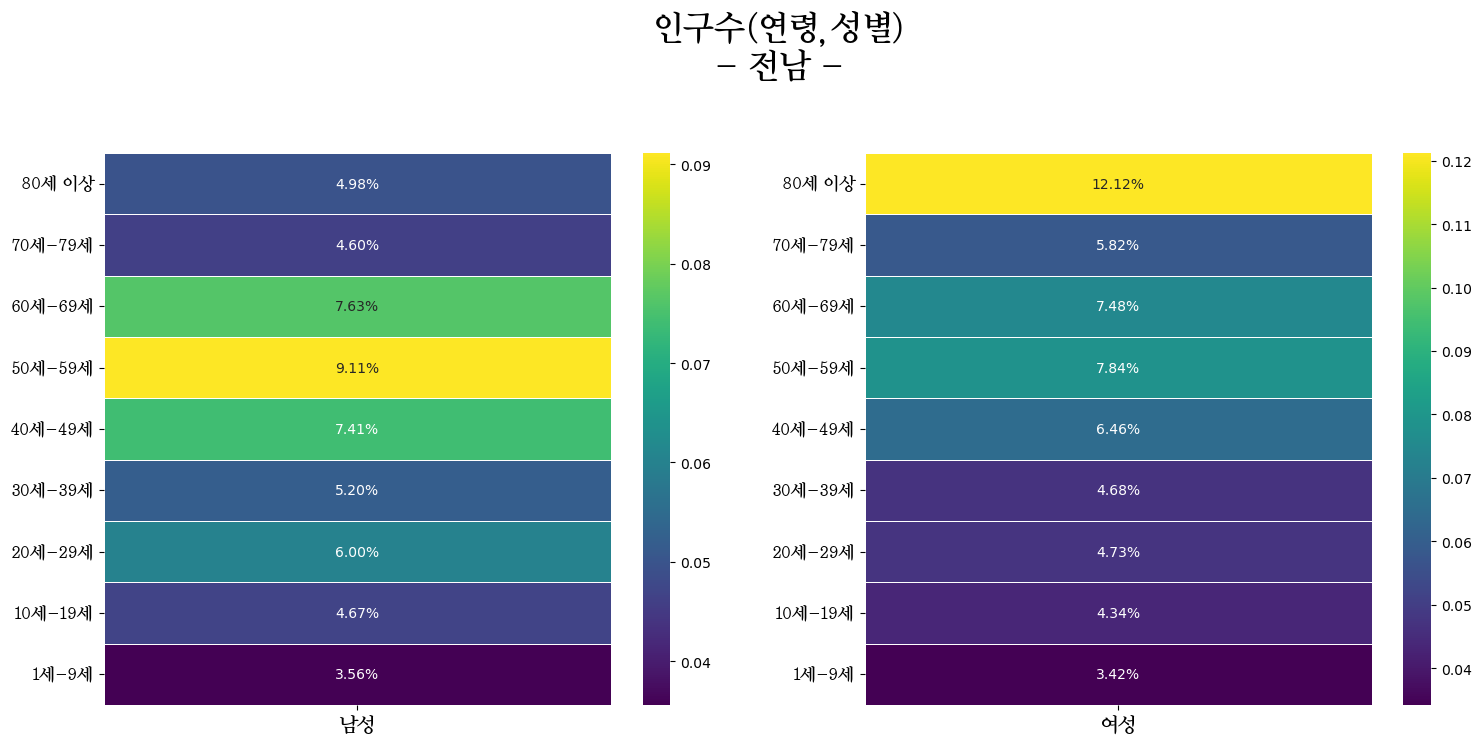

In [53]:
data_m = {
    '남성': jeonnam_m[1:] / (jeonnam_m[0]+jeonnam_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

data_w = {
    '여성': jeonnam_w[1:] / (jeonnam_m[0]+jeonnam_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

df_m = pd.DataFrame(data_m)
df_w = pd.DataFrame(data_w)

# 데이터 뒤집기
df_m = df_m.iloc[::-1]
df_w = df_w.iloc[::-1]

# 나이 그룹 레이블 설정
age_labels = ['80세 이상', '70세-79세', '60세-69세', '50세-59세', '40세-49세', '30세-39세', '20세-29세', '10세-19세', '1세-9세']
df_m.index = age_labels
df_w.index = age_labels

# 색상 맵 및 정규화
cmap = plt.get_cmap('viridis')
normalize_m = plt.Normalize(vmin=df_m.values.min(), vmax=df_m.values.max())
normalize_w = plt.Normalize(vmin=df_w.values.min(), vmax=df_w.values.max())

colors_m = [cmap(normalize_m(value)) for value in df_m.values.flatten()]
colors_w = [cmap(normalize_w(value)) for value in df_w.values.flatten()]

# 플롯 설정
fig, ax = plt.subplots(1, 2, figsize=(18, 8))  # 1행 2열로 subplot 생성

# seaborn의 heatmap 사용
heatmap_m = sns.heatmap(df_m, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[0])
heatmap_w = sns.heatmap(df_w, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[1])

# 공통된 title 설정
fig.suptitle('인구수(연령,성별)\n- 전남 -\n', fontproperties=font_prop, fontsize=25, fontweight='bold')

# y축 레이블 설정 (비율은 이미 플롯 안에 표시되므로 생략)
for a in ax:
    a.set_yticklabels(df_m.index, rotation=0, fontproperties=font_prop, fontweight='bold', fontsize=13)  # y축 레이블에 나이 그룹 표시

# 컬럼 이름에 한글 폰트 적용
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), fontproperties=font_prop, fontsize=15, fontweight='bold')

# 타이틀과 그래프 사이에 여백 추가
plt.subplots_adjust(top=0.8)
plt.show()


In [40]:
geongbuk_m = [df.iloc[46:47,3:4],df.iloc[46:47,6:7],df.iloc[46:47,9:10],df.iloc[46:47,12:13],df.iloc[46:47,15:16],df.iloc[46:47,18:19],df.iloc[46:47,21:22],df.iloc[46:47,24:25],df.iloc[46:47,27:28],df.iloc[46:47,35:36]]
geongbuk_m = [value for df in geongbuk_m for value in df.values[0]]
print(geongbuk_m)

geongbuk_w = [df.iloc[47:48,3:4],df.iloc[47:48,6:7],df.iloc[47:48,9:10],df.iloc[47:48,12:13],df.iloc[47:48,15:16],df.iloc[47:48,18:19],df.iloc[47:48,21:22],df.iloc[47:48,24:25],df.iloc[47:48,27:28],df.iloc[47:48,35:36]]
geongbuk_w = [value for df in geongbuk_w for value in df.values[0]]
print(geongbuk_w)


[1319711.5, 94797.5, 117463.0, 158196.5, 151518.5, 196742.5, 235049.0, 208367.0, 108401.5, 116335.5]
[1300116.0, 89183.5, 106283.0, 121122.5, 132097.5, 180791.5, 218794.5, 210413.5, 133403.5, 266660.5]


/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.

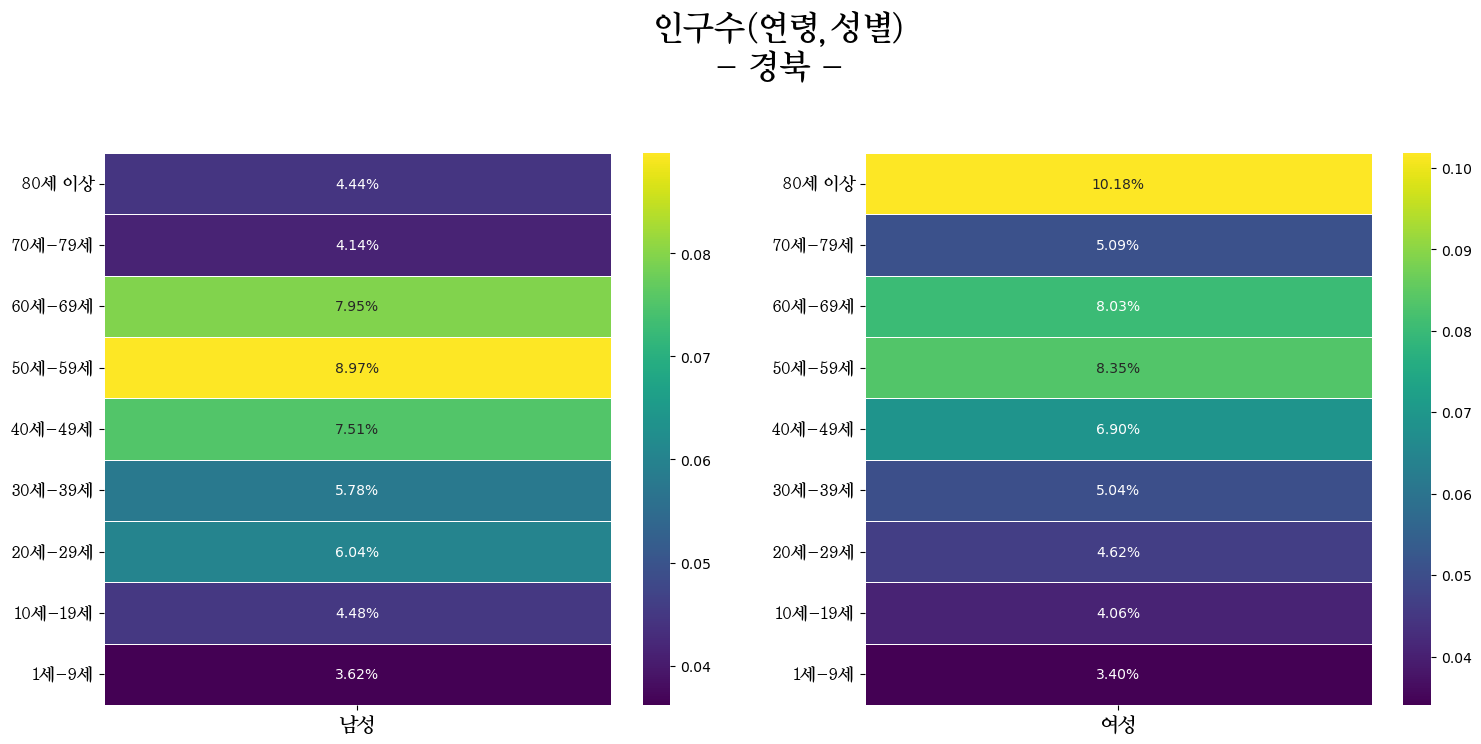

In [54]:
data_m = {
    '남성': geongbuk_m[1:] / (geongbuk_m[0]+geongbuk_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

data_w = {
    '여성': geongbuk_w[1:] / (geongbuk_m[0]+geongbuk_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

df_m = pd.DataFrame(data_m)
df_w = pd.DataFrame(data_w)

# 데이터 뒤집기
df_m = df_m.iloc[::-1]
df_w = df_w.iloc[::-1]

# 나이 그룹 레이블 설정
age_labels = ['80세 이상', '70세-79세', '60세-69세', '50세-59세', '40세-49세', '30세-39세', '20세-29세', '10세-19세', '1세-9세']
df_m.index = age_labels
df_w.index = age_labels

# 색상 맵 및 정규화
cmap = plt.get_cmap('viridis')
normalize_m = plt.Normalize(vmin=df_m.values.min(), vmax=df_m.values.max())
normalize_w = plt.Normalize(vmin=df_w.values.min(), vmax=df_w.values.max())

colors_m = [cmap(normalize_m(value)) for value in df_m.values.flatten()]
colors_w = [cmap(normalize_w(value)) for value in df_w.values.flatten()]

# 플롯 설정
fig, ax = plt.subplots(1, 2, figsize=(18, 8))  # 1행 2열로 subplot 생성

# seaborn의 heatmap 사용
heatmap_m = sns.heatmap(df_m, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[0])
heatmap_w = sns.heatmap(df_w, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[1])

# 공통된 title 설정
fig.suptitle('인구수(연령,성별)\n- 경북 -\n', fontproperties=font_prop, fontsize=25, fontweight='bold')

# y축 레이블 설정 (비율은 이미 플롯 안에 표시되므로 생략)
for a in ax:
    a.set_yticklabels(df_m.index, rotation=0, fontproperties=font_prop, fontweight='bold', fontsize=13)  # y축 레이블에 나이 그룹 표시

# 컬럼 이름에 한글 폰트 적용
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), fontproperties=font_prop, fontsize=15, fontweight='bold')

# 타이틀과 그래프 사이에 여백 추가
plt.subplots_adjust(top=0.8)
plt.show()


In [43]:
geongnam_m = [df.iloc[49:50,3:4],df.iloc[49:50,6:7],df.iloc[49:50,9:10],df.iloc[49:50,12:13],df.iloc[49:50,15:16],df.iloc[49:50,18:19],df.iloc[49:50,21:22],df.iloc[49:50,24:25],df.iloc[49:50,27:28],df.iloc[49:50,35:36]]
geongnam_m = [value for df in geongnam_m for value in df.values[0]]
print(geongnam_m)

geongnam_w = [df.iloc[50:51,3:4],df.iloc[50:51,6:7],df.iloc[50:51,9:10],df.iloc[50:51,12:13],df.iloc[50:51,15:16],df.iloc[50:51,18:19],df.iloc[50:51,21:22],df.iloc[50:51,24:25],df.iloc[50:51,27:28],df.iloc[50:51,35:36]]
geongnam_w = [value for df in geongnam_w for value in df.values[0]]
print(geongnam_w)


[1666507.5, 133530.0, 167937.5, 206077.5, 202888.0, 271704.0, 294667.0, 236483.5, 109721.0, 102255.5]
[1644741.0, 126113.0, 153660.0, 163659.0, 184870.0, 256467.0, 282361.5, 239090.0, 136553.0, 251415.0]


/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.

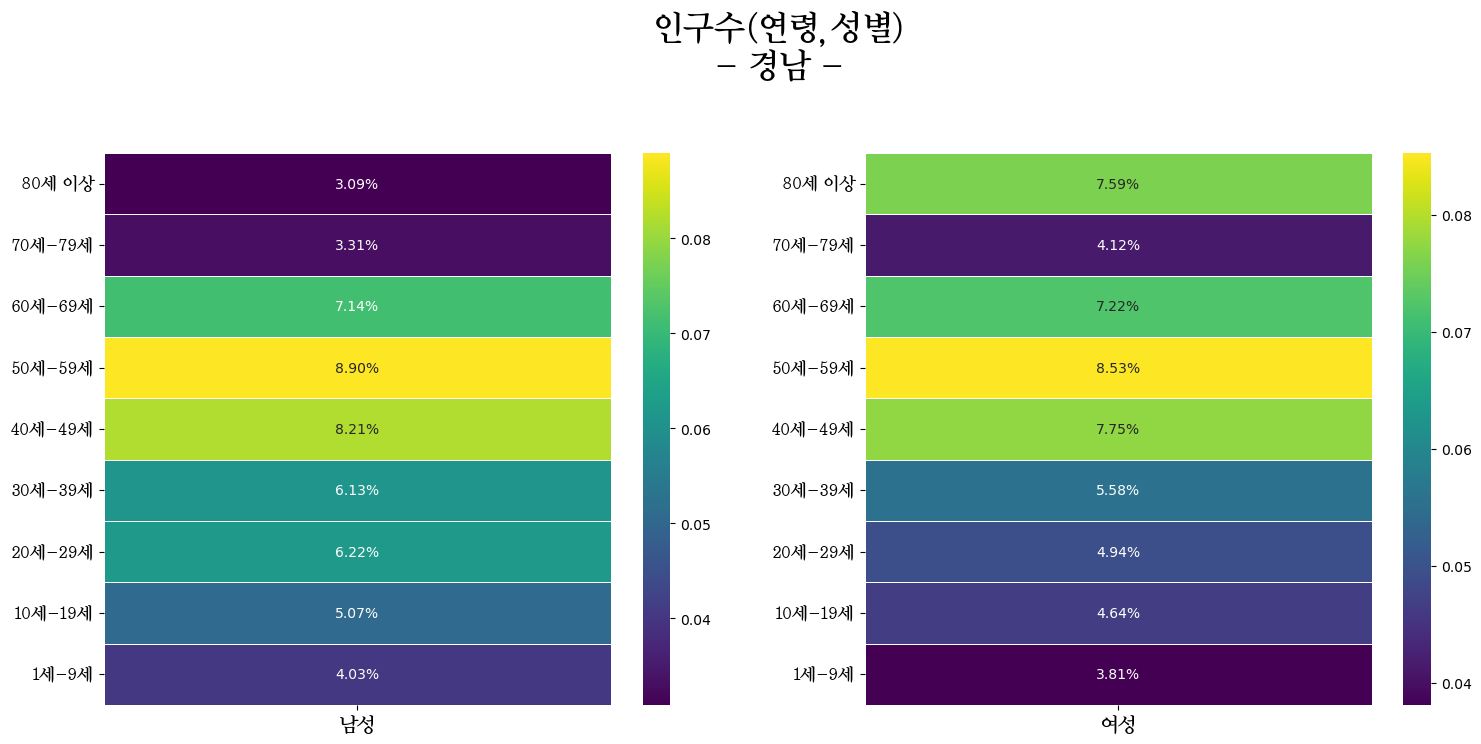

In [55]:
data_m = {
    '남성': geongnam_m[1:] / (geongnam_m[0]+geongnam_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

data_w = {
    '여성': geongnam_w[1:] / (geongnam_m[0]+geongnam_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

df_m = pd.DataFrame(data_m)
df_w = pd.DataFrame(data_w)

# 데이터 뒤집기
df_m = df_m.iloc[::-1]
df_w = df_w.iloc[::-1]

# 나이 그룹 레이블 설정
age_labels = ['80세 이상', '70세-79세', '60세-69세', '50세-59세', '40세-49세', '30세-39세', '20세-29세', '10세-19세', '1세-9세']
df_m.index = age_labels
df_w.index = age_labels

# 색상 맵 및 정규화
cmap = plt.get_cmap('viridis')
normalize_m = plt.Normalize(vmin=df_m.values.min(), vmax=df_m.values.max())
normalize_w = plt.Normalize(vmin=df_w.values.min(), vmax=df_w.values.max())

colors_m = [cmap(normalize_m(value)) for value in df_m.values.flatten()]
colors_w = [cmap(normalize_w(value)) for value in df_w.values.flatten()]

# 플롯 설정
fig, ax = plt.subplots(1, 2, figsize=(18, 8))  # 1행 2열로 subplot 생성

# seaborn의 heatmap 사용
heatmap_m = sns.heatmap(df_m, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[0])
heatmap_w = sns.heatmap(df_w, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[1])

# 공통된 title 설정
fig.suptitle('인구수(연령,성별)\n- 경남 -\n', fontproperties=font_prop, fontsize=25, fontweight='bold')

# y축 레이블 설정 (비율은 이미 플롯 안에 표시되므로 생략)
for a in ax:
    a.set_yticklabels(df_m.index, rotation=0, fontproperties=font_prop, fontweight='bold', fontsize=13)  # y축 레이블에 나이 그룹 표시

# 컬럼 이름에 한글 폰트 적용
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), fontproperties=font_prop, fontsize=15, fontweight='bold')

# 타이틀과 그래프 사이에 여백 추가
plt.subplots_adjust(top=0.8)
plt.show()


In [44]:
jeju_m = [df.iloc[52:53,3:4],df.iloc[52:53,6:7],df.iloc[52:53,9:10],df.iloc[52:53,12:13],df.iloc[52:53,15:16],df.iloc[52:53,18:19],df.iloc[52:53,21:22],df.iloc[52:53,24:25],df.iloc[52:53,27:28],df.iloc[52:53,35:36]]
jeju_m = [value for df in jeju_m for value in df.values[0]]
print(jeju_m)

jeju_w = [df.iloc[53:54,3:4],df.iloc[53:54,6:7],df.iloc[53:54,9:10],df.iloc[53:54,12:13],df.iloc[53:54,15:16],df.iloc[53:54,18:19],df.iloc[53:54,21:22],df.iloc[53:54,24:25],df.iloc[53:54,27:28],df.iloc[53:54,35:36]]
jeju_w = [value for df in jeju_w for value in df.values[0]]
print(jeju_w)


[336679.5, 30359.5, 36845.0, 43119.5, 41010.5, 57021.5, 58456.0, 40436.5, 20604.0, 20821.0]
[334313.0, 28758.0, 33597.5, 38478.5, 40362.0, 53929.5, 53961.0, 40791.5, 24650.0, 49713.0]


/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.

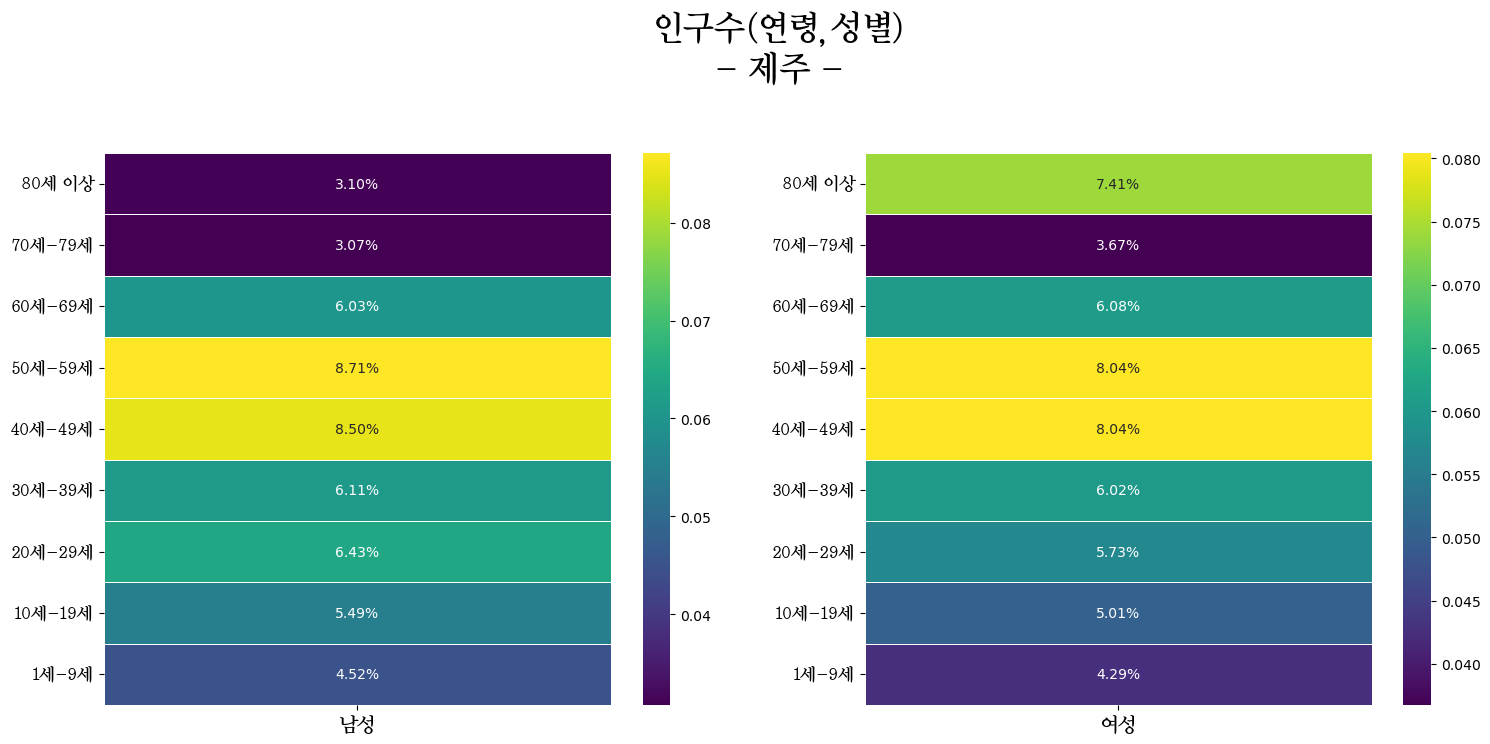

In [56]:
data_m = {
    '남성': jeju_m[1:] / (jeju_m[0]+jeju_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

data_w = {
    '여성': jeju_w[1:] / (jeju_m[0]+jeju_w[0]),  # 1번 인덱스부터 끝까지의 값을 total로 나누기
}

df_m = pd.DataFrame(data_m)
df_w = pd.DataFrame(data_w)

# 데이터 뒤집기
df_m = df_m.iloc[::-1]
df_w = df_w.iloc[::-1]

# 나이 그룹 레이블 설정
age_labels = ['80세 이상', '70세-79세', '60세-69세', '50세-59세', '40세-49세', '30세-39세', '20세-29세', '10세-19세', '1세-9세']
df_m.index = age_labels
df_w.index = age_labels

# 색상 맵 및 정규화
cmap = plt.get_cmap('viridis')
normalize_m = plt.Normalize(vmin=df_m.values.min(), vmax=df_m.values.max())
normalize_w = plt.Normalize(vmin=df_w.values.min(), vmax=df_w.values.max())

colors_m = [cmap(normalize_m(value)) for value in df_m.values.flatten()]
colors_w = [cmap(normalize_w(value)) for value in df_w.values.flatten()]

# 플롯 설정
fig, ax = plt.subplots(1, 2, figsize=(18, 8))  # 1행 2열로 subplot 생성

# seaborn의 heatmap 사용
heatmap_m = sns.heatmap(df_m, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[0])
heatmap_w = sns.heatmap(df_w, annot=True, fmt=".2%", cmap=cmap, cbar=True, linewidths=.5, ax=ax[1])

# 공통된 title 설정
fig.suptitle('인구수(연령,성별)\n- 제주 -\n', fontproperties=font_prop, fontsize=25, fontweight='bold')

# y축 레이블 설정 (비율은 이미 플롯 안에 표시되므로 생략)
for a in ax:
    a.set_yticklabels(df_m.index, rotation=0, fontproperties=font_prop, fontweight='bold', fontsize=13)  # y축 레이블에 나이 그룹 표시

# 컬럼 이름에 한글 폰트 적용
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), fontproperties=font_prop, fontsize=15, fontweight='bold')

# 타이틀과 그래프 사이에 여백 추가
plt.subplots_adjust(top=0.8)
plt.show()
